# ADA PROJECT 2 - Dive into the Heart of Chicaco's crime

# Table Of Contents

1. [Introduction](#intro)
2. [Data Collection and Description](#data-collect)
    - [Crime Dataset](#crime)
        - [Data Loading](#data-loading-1)
        - [Data Overview](#data-overview-1)
        - [Data Cleaning](#data-cleaning-1)
        - [Exploratory Data Analysis](#eda-1)
    - [Food Inspection Dataset](#food-inspection)
        - [Data Loading](#data-loading-2)
        - [Data Overview](#data-overview-2)
        - [Data Cleaning](#data-cleaning-2)
        - [Exploratory Data Analysis](#eda-2)     
    - [Taxi Rides Dataset](#taxi-rides)
        - [Data Loading](#data-loading-3)
        - [Data Overview](#data-overview-3)
        - [Data Cleaning](#data-cleaning-3)
        - [Exploratory Data Analysis](#eda-3)
    - [Flu Clinics Dataset](#flu-clinics)
        - [Data Loading](#data-loading-4)
        - [Data Overview](#data-overview-4)
        - [Data Cleaning](#data-cleaning-4)
        - [Exploratory Data Analysis](#eda-4) 
3. [What's next](#what-next)
        
        
        

# Introduction <a name="intro"/> 

To answer the different reasearch questions that we raised, we decided to use the Chicago Crime public dataset that reports crime data in the city during the last 20 years. We also used several other datasets also provided by the city to enrich our analysis. 


The main questions we asked were related to the safety in Chicago as well as the quality of life. That's why we decided to use "Taxi Rides", "Food Inspection", and "Flu Clinics" datasets have a broader view of the different aspects that impacts the quality of life in the city. 


We present here the data collection, descriptive analysis of our data, as well as future plans for the project.

# Data Collection and Description <a name="data-collect"/>

## Crime Dataset <a name="crime"/>

### Abstract: 
This dataset records many crimes committed in the past 20 years in Chicago. We have access to the year, time, location, type of crime, district of each crime. We can thus make a geographical analysis to find concerned areas. We can also see the evolution of violence using the timestamp.

### Note:

This dataset was made publicy available by the city of Chicago and is updated every day. It can be found [here](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

In [101]:
import numpy as np
import pandas as pd
import math

### 0. Data Loading <a name="data-loading-1"/>

_Data path_

In [241]:
DATA_FOLDER = './data/'
CHICAGO_CRIME_DATASET_PATH = DATA_FOLDER + 'chicago_crime.csv'

_Loading dataset_

In [242]:
chicago_crime = pd.read_csv(CHICAGO_CRIME_DATASET_PATH)

/Users/mjouve/opt/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


_Let's have a first look at the data._

In [243]:
chicago_crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


### 1. Data Overview <a name="data-overview-1"/>

_Here are all the attributes,_

In [244]:
print(list(chicago_crime.columns))

['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


_and their corresponding data type._

In [245]:
print(chicago_crime.dtypes)

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object


_We can see that we could cast some attribute to other data types to ensure better storage and make our manipulations easier. For example some 'Object' attribute could be cast to 'string', the 'Date' attribute can be cast to a 'Date' type..._

_Here is the official description of each attribute:_
- **ID:** _Unique identifier for the record._
- **Case Number:** _The Chicago Police Department RD Number (Records Division Number), which is unique to the incident._
- **Date:** _Date when the incident occurred. This is sometimes a best estimate._
- **Block:** _The partially redacted address where the incident occurred, placing it on the same block as the actual address._
- **IUCR:** _The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e._
- **Primary Type:** _The primary description of the IUCR code._
- **Description:** _The secondary description of the IUCR code, a subcategory of the primary description._
- **Location Description:** _Description of the location where the incident occurred._
- **Arrest:** _Indicates whether an arrest was made._
- **Domestic:** _Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act._
- **Beat:** _Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74._
- **District:** _Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r._
- **Ward:** _The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76._
- **Community Area:** _Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6._
- **FBI Code:** _UIndicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_type_
- **X Coordinate:** _The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block._
- **Y Coordinate:** _The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block._
- **Year:** _Year the incident occurred._
- **Updated On:** _Date and time the record was last updated._
- **Latitude:** _The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block._
- **Longitude:** _The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block._
- **Location:** _The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block._

_Let's see the total size._

In [246]:
rows, features = chicago_crime.shape
print('There are {r} entries, each having {f} features.'.format(r = rows, f = features))

There are 7011333 entries, each having 22 features.


_Let's have an overview of each attribute._

In [247]:
chicago_crime.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7.011333e+06,7.011333e+06,7.011284e+06,6.396505e+06,6.397837e+06,6.944525e+06,6.944525e+06,7.011333e+06,6.944525e+06,6.944525e+06
mean,6.430191e+06,1.189883e+03,1.129731e+01,2.270279e+01,3.755591e+01,1.164537e+06,1.885734e+06,2.008715e+03,4.184205e+01,-8.767173e+01
std,3.158253e+06,7.032033e+02,6.945929e+00,1.383502e+01,2.153585e+01,1.715685e+04,3.268870e+04,5.304911e+00,8.995043e-02,6.209020e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.511443e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152945e+06,1.859184e+06,2.004000e+03,4.176889e+01,-8.771380e+01
50%,6.418535e+06,1.111000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.166026e+06,1.890643e+06,2.008000e+03,4.185572e+01,-8.766609e+01
75%,9.162359e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176352e+06,1.909272e+06,2.013000e+03,4.190677e+01,-8.762833e+01
max,1.189601e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.019000e+03,4.202291e+01,-8.752453e+01


_Are there any missing values in the dataset?_

In [248]:
# Check which columns contains missing values.
chicago_crime.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      5847
Arrest                       0
Domestic                     0
Beat                         0
District                    49
Ward                    614828
Community Area          613496
FBI Code                     0
X Coordinate             66808
Y Coordinate             66808
Year                         0
Updated On                   0
Latitude                 66808
Longitude                66808
Location                 66808
dtype: int64

### 2. Data Cleaning <a name="data-cleaning-1"/>

_Let's see if the data contains duplicate, i.e rows with the same **ID**._

In [249]:
np.max(list(chicago_crime['ID'].value_counts()))

1

_The maximum count for all 'ID's is 1, thus we can conclude that the dataset doesn't have any duplicates._

_Let's now discuss which attributes we can get rid of. Indeed, some attributes might not be useful for our analysis:_
- _We do not care about identifying uniquely each entry as we do a broad analysis of crime in Chicago so we can remove **ID** and **Case Number**._
- _The **IUCR** attribute is a code description for the crime but we already have the corresponding textual description of the crime by looking at **Primary Type** and **Description** so we can remove it._
- _In order to locate the area of Chicago where a crime happened it would be better to keep an attribute that is general for the city of Chicago. Indeed **Beat**(s) and **District**(s) only refer to Police related areas whereas **Ward**(s) and **Community Area**(s) are relevant area notation not only for Police. We can thus only keep the **Community Area** field._
- _The **FBI Code** is not relevant because we have access to a textual description of the crime._
- _The **Updated On** field is not relevant for our study._
- _We can also remove the **X Coordinate** and **Y Coordinate** attributes because they are relative to the State Plane Illinois East NAD 1983 projection. We can remove the **Block** attribute as it also describes the location. We also have the **Latitude** and **Longitude** attributes which will be easier to manipulate to create spatial visualizations. Moreoever because those two fields are gathered in the **Location** attribute, we can also remove it._

In [250]:
selected_features = ['Date',
                     'Primary Type',
                     'Description',
                     'Location Description',
                     'Arrest',
                     'Domestic',
                     'Community Area',
                     'Year',
                     'Latitude',
                     'Longitude']

In [251]:
# Selecting features of interest and copy them to a new DataFrame
chicago_crime_v2 = chicago_crime[selected_features].copy()

In [252]:
chicago_crime_v2.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude
0,01/01/2001 11:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,45.0,2001,NaN,NaN
1,10/08/2017 03:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,73.0,2017,NaN,NaN
2,03/28/2017 02:00:00 PM,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,70.0,2017,NaN,NaN
3,09/09/2017 08:17:00 PM,THEFT,OVER $500,RESIDENCE,False,False,42.0,2017,NaN,NaN
4,08/26/2017 10:00:00 AM,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,32.0,2017,NaN,NaN


_Now let's see what can be done to remove or replace missing values._
- _First the **Latitude** and **Longitude** fields are critical for our analysis as we need it to localize a crime and analyse which areas are more concerned by violence than others._

In [253]:
chicago_crime_v2[['Latitude']].isnull().sum()

Latitude    66808
dtype: int64

In [254]:
chicago_crime_v2[['Longitude']].isnull().sum()

Longitude    66808
dtype: int64

_We should then remove all the rows with missing location

In [255]:
chicago_crime_v2 = chicago_crime_v2[pd.notnull(chicago_crime_v2['Longitude'])]

_We should now look at other missing values once those are removed._

In [256]:
chicago_crime_v2.isnull().sum()

Date                         0
Primary Type                 0
Description                  0
Location Description      3862
Arrest                       0
Domestic                     0
Community Area          604291
Year                         0
Latitude                     0
Longitude                    0
dtype: int64

_Let's have a look at what is inside the **Location Description** field._

In [257]:
list(chicago_crime_v2['Location Description'].unique())

['AIRCRAFT',
 'STREET',
 'RESIDENTIAL YARD (FRONT/BACK)',
 'RESIDENCE',
 'APARTMENT',
 'CTA BUS',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP',
 'OTHER',
 'RESIDENCE-GARAGE',
 'CTA TRAIN',
 'SCHOOL, PRIVATE, BUILDING',
 'HOTEL/MOTEL',
 'LIBRARY',
 'CTA STATION',
 'SCHOOL, PUBLIC, BUILDING',
 'RESTAURANT',
 'ALLEY',
 'VEHICLE NON-COMMERCIAL',
 'COMMERCIAL / BUSINESS OFFICE',
 'CTA PLATFORM',
 'SIDEWALK',
 'GAS STATION',
 'RESIDENCE PORCH/HALLWAY',
 'SCHOOL, PUBLIC, GROUNDS',
 'POLICE FACILITY/VEH PARKING LOT',
 'GROCERY FOOD STORE',
 'LAKEFRONT/WATERFRONT/RIVERBANK',
 'TAVERN/LIQUOR STORE',
 'ABANDONED BUILDING',
 'PARKING LOT',
 'CTA BUS STOP',
 'GOVERNMENT BUILDING/PROPERTY',
 'BAR OR TAVERN',
 'VACANT LOT/LAND',
 'SMALL RETAIL STORE',
 'PARK PROPERTY',
 'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA',
 'DEPARTMENT STORE',
 'VEHICLE-COMMERCIAL',
 'HOSPITAL BUILDING/GROUNDS',
 'MEDICAL/DENTAL OFFICE',
 'CURRENCY EXCHANGE',
 'OTHER RAILROAD PROP / TRAIN DEPOT',
 

_The list is already exhaustive. It wouldn't make sense to convert the missing values to 'OTHER' since 'OTHER' might correspond to very specific cases. Thus we will keep the missing values for now and see how to deal with them once we need to analyse them._

_Regarding the **Community Area** field we will keep missing values for now as the rows have **Location**(s) but we will remove those rows if we gather data according to community areas to see the evolution per area._

_We will now deal with data types._

In [258]:
chicago_crime_v2.dtypes

Date                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Community Area          float64
Year                      int64
Latitude                float64
Longitude               float64
dtype: object

- _**Date** has to be transformed to a python 'Dates' type._
- _**Primary Type**, **Description**, **Location Description** have to be transformed to a 'str' type._
- _**Community Area** has to be transformed to a 'int' type._

In [259]:
import datetime

In [260]:
chicago_crime_v2['Date'].head()

60345    01/03/2019 07:20:00 PM
62272    03/16/2019 05:58:00 PM
62615    03/12/2019 10:00:00 PM
62648    03/14/2019 06:42:00 PM
62649    03/14/2019 04:03:00 PM
Name: Date, dtype: object

_In the dataset the format is as follow $month$/$day$/$year$ $hour$ $morning$/$evening$._

_The python datetime.datetime is as follow:_

_class datetime.datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0, tzinfo=None, *, fold=0)_

_Let's now change the **Date** field type to a datetime.datetime type._

In [261]:
def to_datetime(s):    
    # getting the date, time and moment (AM or PM)
    date, time, moment = s.split(' ')
    
    # getting month, day and year from the date
    month, day, year = date.split('/')
    
    # getting the hour and minute from time
    hour, minute, _ = time.split(':')
    
    # casting to int
    year = int(year)
    month = int(month)
    day = int(day)
    
    hour = int(hour)
    minute = int(minute)
    
    # we round to the next hour if minute > 30
    if minute > 30:
        hour += 1
    
    if hour >= 12:
        hour -= 12
    
    # we create hour between 0 and 24 
    if moment == 'PM':
        hour += 12
    
    return datetime.datetime(year, month, day, hour)

In [262]:
chicago_crime_v2['Date'] = chicago_crime_v2['Date'].apply(to_datetime)

_We can also split the Date to a 'month', 'day', and 'hour' features to then gather data according to a specific month, or time of day (night or during the day) and have better analysis._

In [263]:
# Creating new features
chicago_crime_v2['Hour'] = chicago_crime_v2['Date'].apply(lambda datetime : datetime.time().hour)
chicago_crime_v2['Day'] = chicago_crime_v2['Date'].apply(lambda datetime : datetime.date().day)
chicago_crime_v2['Month'] = chicago_crime_v2['Date'].apply(lambda datetime : datetime.date().month)

In [264]:
chicago_crime_v2.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude,Hour,Day,Month
60345,2019-01-03 19:00:00,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,76.0,2019,42.002816,-87.906094,19,3,1
62272,2019-03-16 18:00:00,BATTERY,SIMPLE,STREET,False,False,32.0,2019,41.883369,-87.633860,18,16,3
62615,2019-03-12 22:00:00,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,36.0,2019,41.825347,-87.606781,22,12,3
62648,2019-03-14 19:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1.0,2019,42.016542,-87.672499,19,14,3
62649,2019-03-14 16:00:00,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,36.0,2019,41.825299,-87.606961,16,14,3


_We convert the following features to 'str' type._

In [265]:
# Casting to 'str'
chicago_crime_v2['Primary Type'] = chicago_crime_v2['Primary Type'].apply(lambda o : str(o))
chicago_crime_v2['Description'] = chicago_crime_v2['Description'].apply(lambda o : str(o))
chicago_crime_v2['Location Description'] = chicago_crime_v2['Location Description'].apply(lambda o : str(o))

_We convert the **Community Area** field from 'float' to 'int'._

In [266]:
#64 The only way to have 'int' type and 'nan' in the same column is to use the 'Int64' type
chicago_crime_v2 = chicago_crime_v2.astype({'Community Area': 'Int64'})

_Moreover the **Latitude** and **Longitude** features might contains outliers. Indeed, some crimes comitted outside of Chicago might have ended up in the dataset._

_After looking on Google Maps, in order to keep crimes only committed in Chicaco we would need:_
- _41.0 $\leq$ **Latitude** $\leq$ 42.5_
- _-88.0 $\leq$ **Longitude** $\leq$ -87.0_

_Number of rows before removing location outliers:_

In [268]:
chicago_crime_v2.shape[0]

6944525

In [269]:
# Filtering the location
chicago_crime_v2 = chicago_crime_v2[(chicago_crime_v2['Latitude'] >= 41.00)
                                   & (chicago_crime_v2['Latitude'] <= 42.5)
                                   & (chicago_crime_v2['Longitude'] >= -88.00)
                                   & (chicago_crime_v2['Longitude'] <= -87.00)]

_Number of rows after removing location outliers:_

In [270]:
chicago_crime_v2.shape[0]

6944360

_It removed 165 entries._

_Finally we have:_

In [271]:
chicago_crime_v2.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude,Hour,Day,Month
60345,2019-01-03 19:00:00,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,76,2019,42.002816,-87.906094,19,3,1
62272,2019-03-16 18:00:00,BATTERY,SIMPLE,STREET,False,False,32,2019,41.883369,-87.633860,18,16,3
62615,2019-03-12 22:00:00,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,36,2019,41.825347,-87.606781,22,12,3
62648,2019-03-14 19:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1,2019,42.016542,-87.672499,19,14,3
62649,2019-03-14 16:00:00,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,36,2019,41.825299,-87.606961,16,14,3


_and the following types:_

In [272]:
chicago_crime_v2.dtypes

Date                    datetime64[ns]
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Community Area                   Int64
Year                             int64
Latitude                       float64
Longitude                      float64
Hour                             int64
Day                              int64
Month                            int64
dtype: object

In [273]:
import pickle

_We now save the clean dataset for further uses._

In [275]:
# If file exists then load it
try:
    chicago_crime = pickle.load(open("./data/chicago_crime.pickle", "rb"))
# Otherwise create it
except (OSError, IOError) as e:
    chicago_crime = chicago_crime_v2
    pickle.dump(chicago_crime, open("./data/chicago_crime.pickle", "wb"))

In [276]:
chicago_crime.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude,Hour,Day,Month
60345,2019-01-03 19:00:00,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,76,2019,42.002816,-87.906094,19,3,1
62272,2019-03-16 18:00:00,BATTERY,SIMPLE,STREET,False,False,32,2019,41.883369,-87.633860,18,16,3
62615,2019-03-12 22:00:00,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,36,2019,41.825347,-87.606781,22,12,3
62648,2019-03-14 19:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1,2019,42.016542,-87.672499,19,14,3
62649,2019-03-14 16:00:00,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,36,2019,41.825299,-87.606961,16,14,3


### 3. Exploratory Data Analysis <a name="eda-1"/>

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

_Let's have a look at how the features are correlated._

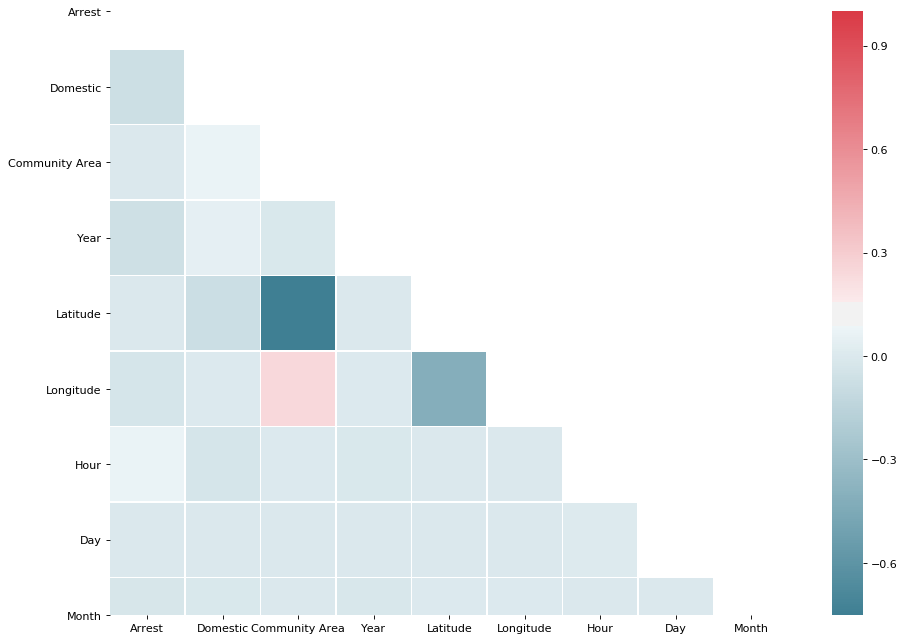

In [135]:
# Create the matrix and the figure.
f, ax = plt.subplots(figsize = (14, 10), dpi = 80)
corr = chicago_crime.corr()

# Create the mask to hide the duplicated cells.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Create the heatmap with the correlation matrix data
sns.heatmap(corr,
            mask = mask,
            cmap = sns.diverging_palette(220, 10, as_cmap = True),
            square = True,
            linewidths = 0.2,
            ax = ax)
plt.show()

_We can observe that the features are not very correlated which mean that we do not have unecessary features that could be guessed from other ones._

_We can first have a look at the different kind of crimes and their respective counts._

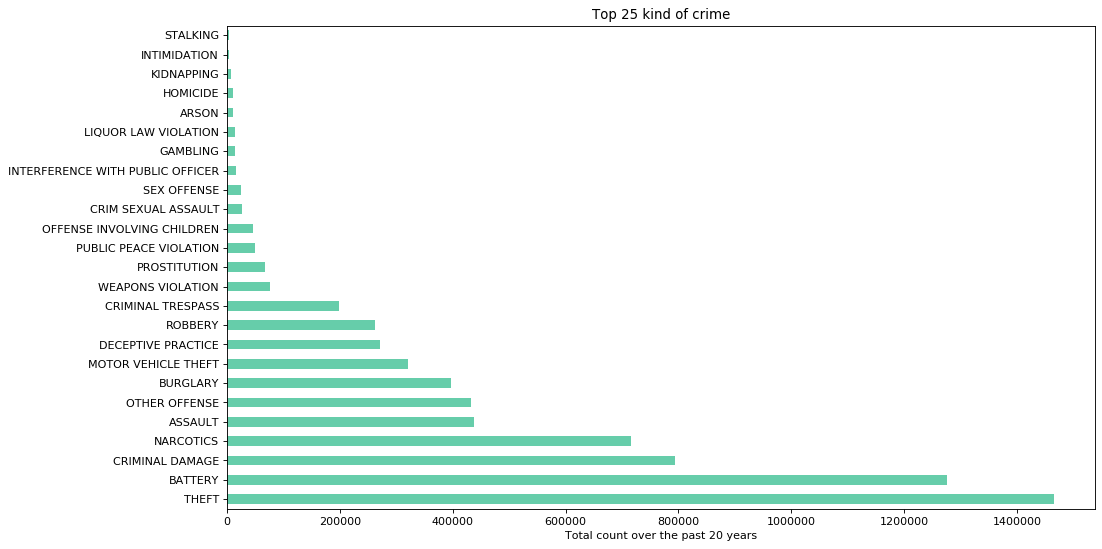

In [209]:
# Plot the 25 most common crimes type
plt.figure(figsize=(14, 8), dpi = 80)
chicago_crime['Primary Type'].value_counts().head(25).plot(kind='barh', color='mediumaquamarine')
plt.title('Top 25 kind of crime')
plt.xlabel('Total count over the past 20 years')
plt.show()

_From each of those categories we can dive deeper: for example here are the most common kind of 'THEFT'._

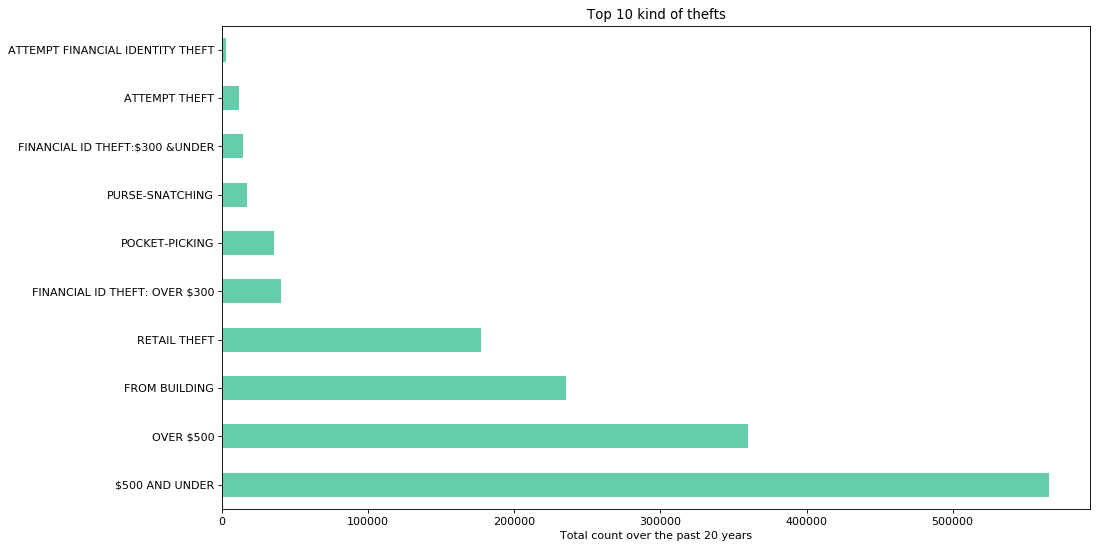

In [210]:
# Selecting all Thefts
thefts = chicago_crime[chicago_crime['Primary Type'] == 'THEFT']

# Plotting the top 10 kind of thefts
plt.figure(figsize=(14, 8), dpi = 80)
thefts['Description'].value_counts().head(10).plot(kind='barh', color='mediumaquamarine')
plt.title('Top 10 kind of thefts')
plt.xlabel('Total count over the past 20 years')
plt.show()

_One thing that can be done for further analysis would be to only consider a kind of crime, for example sexual assaults, or major crime. Indeed we could guess that small thefts happen everywhere and do not necessarily represent a violent city._

_Let's now have a look at the different crime location._

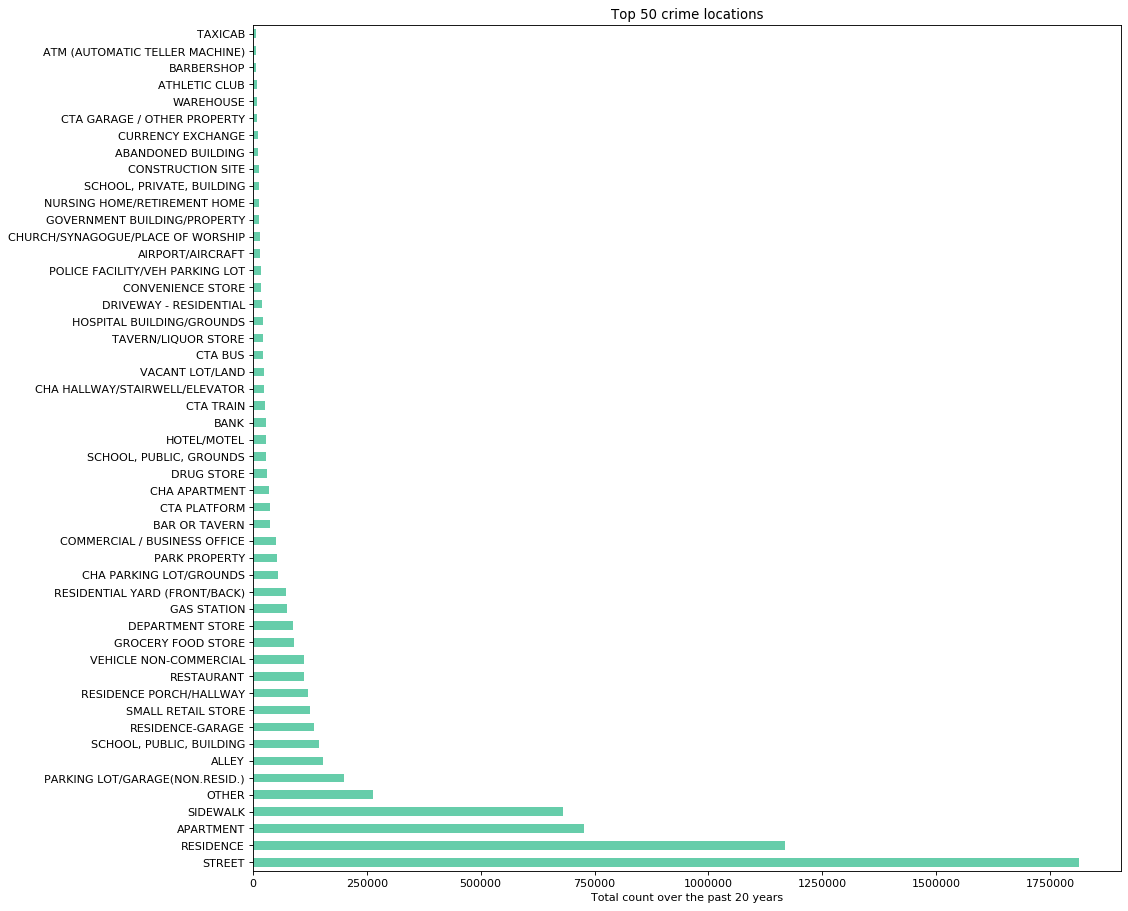

In [277]:
# Plot the 50 most appearning location type
plt.figure(figsize=(14, 14), dpi = 80)
chicago_crime['Location Description'].value_counts().head(50).plot(kind='barh', color='mediumaquamarine')
plt.title('Top 50 crime locations')
plt.xlabel('Total count over the past 20 years')
plt.show()

_We could also make bigger groups such as 'PUBLIC' or 'PRIVATE' for further analysis. Indeed some locations seem to be broad such as 'STREET' and other very specific. We could thus make our own categories._

_We can have a look at the distribution of domestic / non-domestic crime._

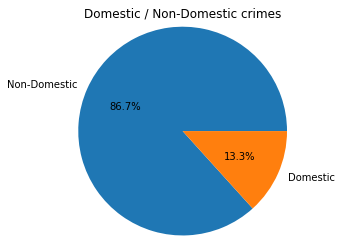

False    6021263
True      923262
Name: Domestic, dtype: int64


In [139]:
# Show the proportion of Domestic / Non-Domestic crimes:
domestic_count = chicago_crime['Domestic'].value_counts()
ax = domestic_count.plot(kind='pie', labels= ['Non-Domestic', 'Domestic'], autopct='%1.1f%%',  radius=1.2)
ax.set_ylabel('')
plt.title('Domestic / Non-Domestic crimes')
plt.show()

print(domestic_count)

_What could be interesting to do is to see the same plot for some specific kind of crime such as sexual assault, or sex offense, murder (we often say that murderers are usually relatives of the victim)._

_We can do the same plot with the 'Arrest' feature. Indeed, it could help us predict what are the chances of arresting someome given some other features such as kind of crime or location._

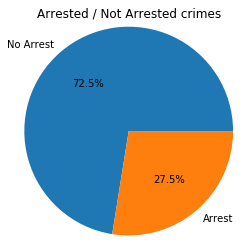

False    5032986
True     1911539
Name: Arrest, dtype: int64


In [140]:
# Show the proportion of Arrest / Not-Arrest crimes:
arrest_count = chicago_crime['Arrest'].value_counts()

ax = arrest_count.plot(kind='pie', labels= ['No Arrest', 'Arrest'], autopct='%1.1f%%',  radius=1.2)
ax.set_ylabel('')
plt.title('Arrested / Not Arrested crimes')
plt.show()

print(arrest_count)

_We could also visualize the evolution of that ratio with the years. We can guess that Police has better results nowadays due to advance in crime analysis._

_Let's now have a look at spatial / temporal features._

_We can first take all the non null **Community Area** and see what what areas are most concerned by violence. We can thus tell which areas to avoid and which one are safer._

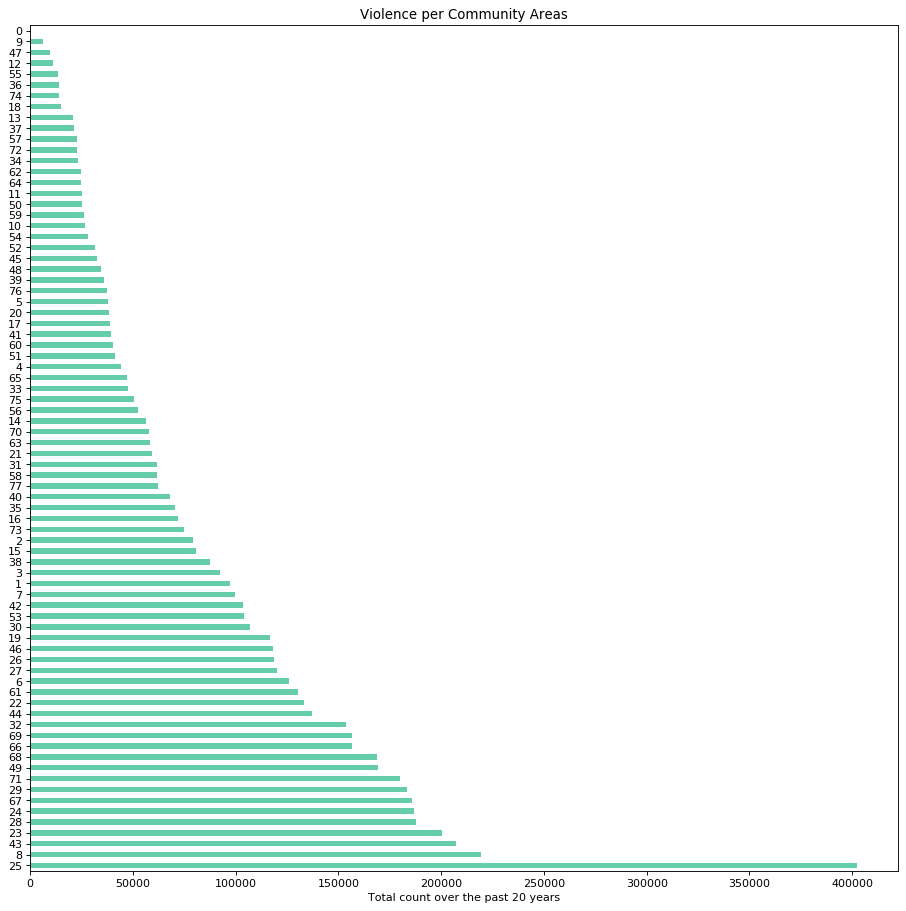

In [212]:
# Selecting 'Community Area' feature and remove missing values
community_areas_count = chicago_crime['Community Area'].dropna().value_counts()

plt.figure(figsize=(14, 14), dpi = 80)
community_areas_count.plot(kind='barh', color='mediumaquamarine')
plt.title('Violence per Community Areas')
plt.xlabel('Total count over the past 20 years')
plt.show()

_We can clearly see that the community area # 25 is the most violent one. Let's have a look at the Chicago map to see where it is:_

![Chicago Community Areas](https://upload.wikimedia.org/wikipedia/commons/9/94/Blank_Chicago_Community_Area_Map.png)

_One violent hub seems to gather areas 25, 23, 24, 8. Areas far away from the center seem to be less violent overall. It is the case for areas 9, 12, 55._

_Let's have a look at what are the most important kind of crime in area 25._

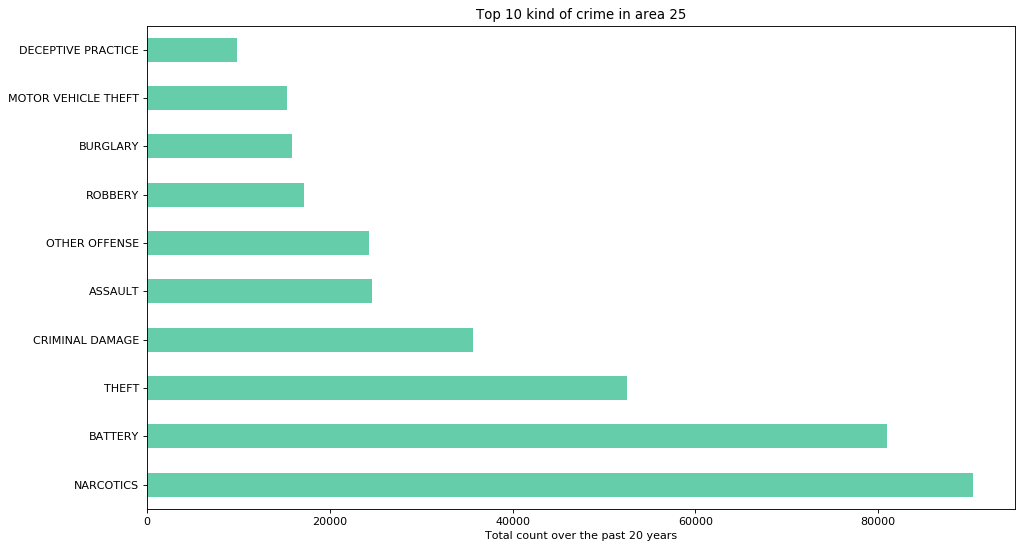

In [213]:
# Selecting crime committed in the Comnmunity Area # 25
chicago_crime_area_25 = chicago_crime[chicago_crime['Community Area'] == 25]

# Plot the 10 most common crime type in area 25
plt.figure(figsize=(14, 8), dpi = 80)
chicago_crime_area_25['Primary Type'].value_counts().head(10).plot(kind='barh', color='mediumaquamarine')
plt.title('Top 10 kind of crime in area 25')
plt.xlabel('Total count over the past 20 years')
plt.show()

_Compared to the same graph for the whole city, we can clearly see that area 25 is a zone with criminal activity. Indeed, the most common kind of crime is 'NARCOTIC' which is typical for districts with criminal activities._

_How active is the Police in this area? Let's see the ratio for arrests in that area._

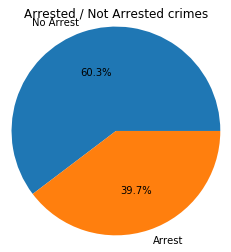

False    242548
True     159610
Name: Arrest, dtype: int64


In [157]:
# Selecting the 'Arrest' feature
arrest_count_area_25 = chicago_crime_area_25['Arrest'].value_counts()

ax = arrest_count_area_25.plot(kind='pie', labels= ['No Arrest', 'Arrest'], autopct='%1.1f%%',  radius=1.2)
ax.set_ylabel('')
plt.title('Arrested / Not Arrested crimes')
plt.show()

print(arrest_count_area_25)

_With a better Arrest rate we can guess that Police is already focusing its activity toward area 25._

_Here are the 'NARCOTICS' crimes for area 25 with the 'Arrest' feature used for coloring._

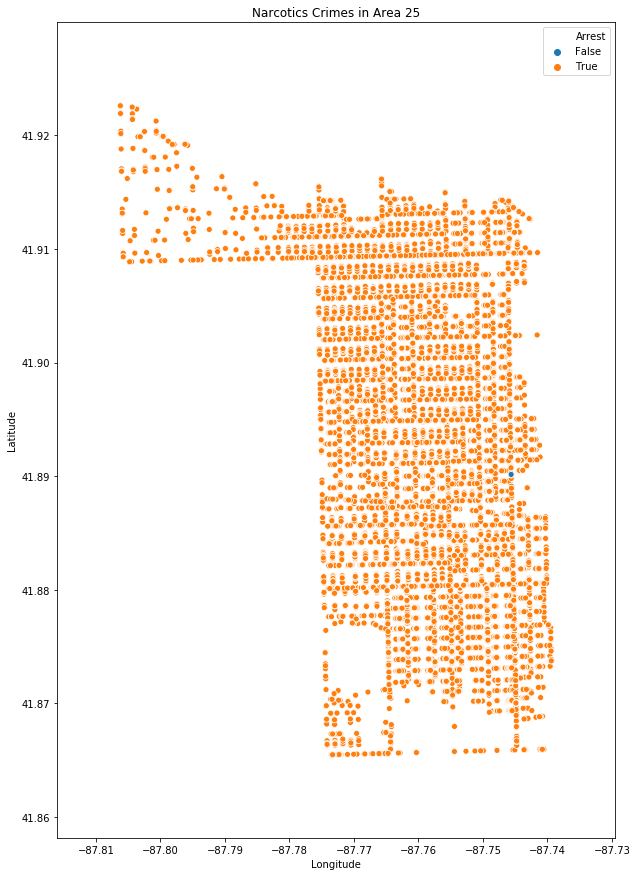

In [167]:
plt.figure(figsize=(10, 15))
sns.scatterplot(x='Longitude', y='Latitude', hue='Arrest', data = chicago_crime_area_25[chicago_crime_area_25['Primary Type'] == 'NARCOTICS'])
plt.title('Narcotics Crimes in Area 25')
plt.show()

_It seems like Police is very active for Narcotics related crimes as almost all of them result in an arrest._

_Let's now see how crime rate evolved with the years._

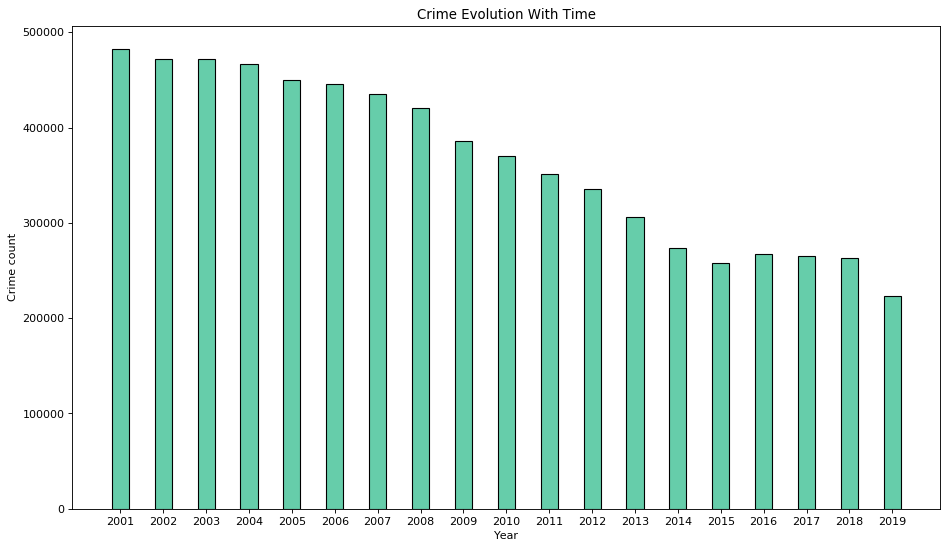

In [226]:
# Plot the crime rate evolution with the years
plt.figure(figsize=(14, 8), dpi = 80)
year_crime = chicago_crime['Year'].value_counts().sort_index()
plt.bar(year_crime.index, year_crime.values, width=0.4, color='mediumaquamarine', edgecolor='black')
plt.xticks(year_crime.index)
plt.title('Crime Evolution With Time')
plt.ylabel('Crime count')
plt.xlabel('Year')
plt.show()

_Is the Police getting better with time?_

In [221]:
# Selecting crimes that led to an arrest
year_crime_arrest = chicago_crime[chicago_crime['Arrest'] == True]['Year'].value_counts().sort_index()

In [222]:
# Selecting crimes for which the Police never arrested anyone
year_crime_no_arrest = chicago_crime[chicago_crime['Arrest'] == False]['Year'].value_counts().sort_index()

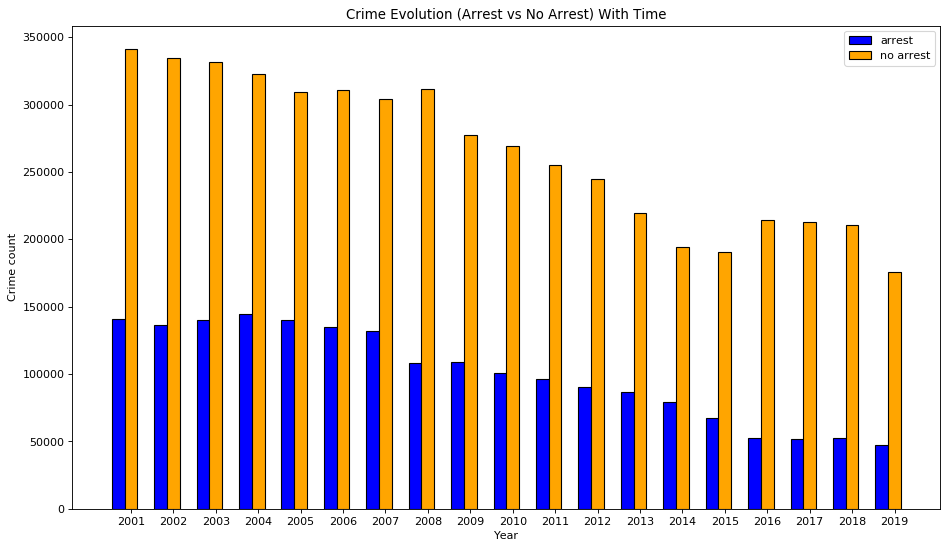

In [230]:
plt.figure(figsize=(14, 8), dpi = 80)
barWidth = 0.3

# Arrest
bars1 = year_crime_arrest.values

# No arrest
bars2 = year_crime_no_arrest.values
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create Arrest bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='arrest')
 
# Create No Arrest bars
plt.bar(r2, bars2, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='no arrest')
 
plt.xticks([r + barWidth for r in range(len(bars1))], year_crime_arrest.index)
plt.title('Crime Evolution (Arrest vs No Arrest) With Time')
plt.ylabel('Crime count')
plt.xlabel('Year')
plt.legend()
plt.show()


_The amount of arrests made since 2015 dropped. However violence increased in 2015. What could be the cause? Are criminals getting better?_

_What about months? Are crimials more active during summer (tourism) ?_

In [228]:
def toMonth(number):
    if number == 1:
        return 'January'
    elif number == 2:
        return 'February'
    elif number == 3:
        return 'March'
    elif number == 4:
        return 'April'
    elif number == 5:
        return 'May'
    elif number == 6:
        return 'June'
    elif number == 7:
        return 'July'
    elif number == 8:
        return 'August'
    elif number == 9:
        return 'September'
    elif number == 10:
        return 'October'
    elif number == 11:
        return 'November'
    elif number == 12:
        return 'December'

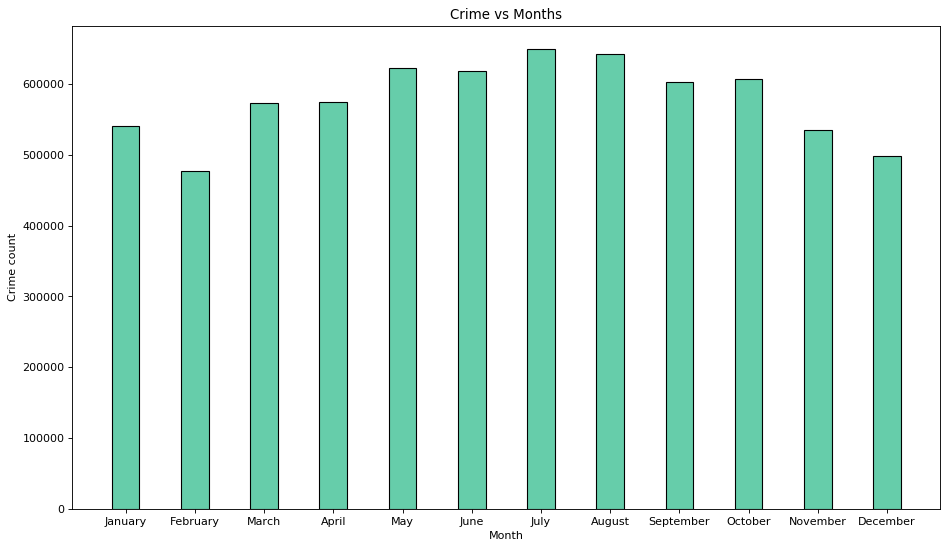

In [233]:
# Plot the crime vs month of the year
plt.figure(figsize=(14, 8), dpi = 80)
month_crime = chicago_crime['Month'].value_counts().sort_index()
plt.bar(month_crime.index, month_crime.values, width=0.4, color='mediumaquamarine', edgecolor='black')
plt.xticks(range(1, len(month_crime.index) + 1), [toMonth(number) for number in month_crime.index])
plt.title('Crime vs Months')
plt.ylabel('Crime count')
plt.xlabel('Month')
plt.show()

_Indeed, it seems like there is a rise in crime number during the summer months._

_What about time of the day?_

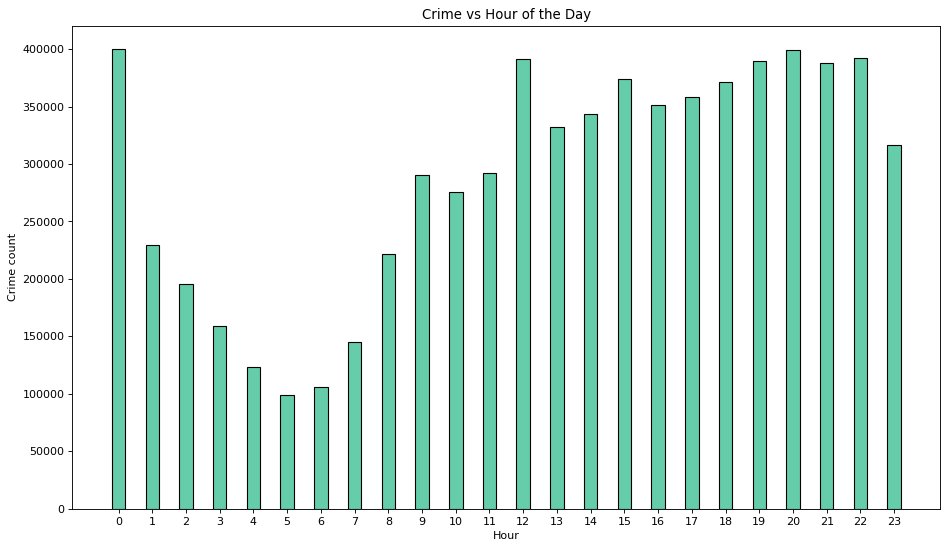

In [278]:
# Plot the crime vs hour of the day
plt.figure(figsize=(14, 8), dpi = 80)
hour_crime = chicago_crime['Hour'].value_counts().sort_index()
plt.bar(hour_crime.index, hour_crime.values, width=0.4, color='mediumaquamarine', edgecolor='black')
plt.xticks(hour_crime.index)
plt.title('Crime vs Hour of the Day')
plt.ylabel('Crime count')
plt.xlabel('Hour')
plt.show()

_It seems better to do your daily jogging at 5 am rather than at 7 pm. This plot isn't surprising, violence is high when it's dark, is lower at daybreak and increases during the day. Midday is also a peak hour for crimes which is also not surprising as people leave office at that time._

## Food Inspection Dataset <a name="food-inspection"/>

### Abstract: 
This dataset records the results of food inspection since 2010 in Chicago. We have access to the name and location of the food institution, the results of the test. We can find areas that tend to fail inspections and see how they compare with the crime rate. It can tell us if crimes are located in areas with good restaurants (might be richer areas) or bad ones (might be poorer areas).

### Notes 

This dataset is available on : https://www.kaggle.com/chicago/chicago-food-inspections

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 0. Data Loading <a name="data-loading-2"/>

In [4]:
# Load the data 
FOOD_INSPECTION_PATH = './data/chicago-food-inspections/food-inspections.csv'
food_inspection_data = pd.read_csv(FOOD_INSPECTION_PATH)

In [5]:
food_inspection_data.describe()

,Inspection ID,License #,Zip,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
count,1.968250e+05,1.968080e+05,196775.000000,196135.000000,196135.000000,0.0,0.0,0.0,0.0,0.0
mean,1.449379e+06,1.601134e+06,60628.741949,41.881231,-87.676819,NaN,NaN,NaN,NaN,NaN
std,6.355214e+05,8.963101e+05,121.926320,0.080846,0.058969,NaN,NaN,NaN,NaN,NaN
min,4.424700e+04,0.000000e+00,10014.000000,41.644670,-87.914428,NaN,NaN,NaN,NaN,NaN
25%,1.150792e+06,1.225118e+06,60614.000000,41.834897,-87.707742,NaN,NaN,NaN,NaN,NaN
50%,1.493299e+06,1.979973e+06,60625.000000,41.891980,-87.666812,NaN,NaN,NaN,NaN,NaN
75%,2.009233e+06,2.240843e+06,60643.000000,41.939814,-87.634955,NaN,NaN,NaN,NaN,NaN
max,2.352738e+06,9.999999e+06,60827.000000,42.021064,-87.525094,NaN,NaN,NaN,NaN,NaN


In [6]:
food_inspection_data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,...,Results,Violations,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,2352683,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL,2670642.0,Restaurant,Risk 1 (High),1025 W ADDISON ST,CHICAGO,IL,60613.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':...",NaN,NaN,NaN,NaN,NaN
1,2352734,CHILI'S T-I,CHILI'S (T1-B14),34169.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666.0,...,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,42.008536,-87.914428,"{'latitude': '-87.91442843927047', 'longitude'...",NaN,NaN,NaN,NaN,NaN
2,2352713,NICK'S FIRE GRILL STEAK & LEMONADE INC.,NICK'S FIRE GRILL STEAK & LEMONADE INC.,2699090.0,NaN,Risk 1 (High),2900 W 63RD ST,CHICAGO,IL,60629.0,...,Not Ready,NaN,41.779190,-87.695892,"{'latitude': '-87.69589237398256', 'longitude'...",NaN,NaN,NaN,NaN,NaN
3,2352701,TAQUERIA BLUE LINE INC.,NaN,2703436.0,Restaurant,Risk 1 (High),3401 W BELMONT AVE,CHICAGO,IL,60618.0,...,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939168,-87.712546,"{'latitude': '-87.71254599117191', 'longitude'...",NaN,NaN,NaN,NaN,NaN
4,2352727,PORTAGE PARK DAY NURSERY,MOSAIC EARLY CHILDHOOD ACADEMY,2215815.0,Children's Services Facility,Risk 1 (High),5332-5334 W ADDISON ST,CHICAGO,IL,60641.0,...,Pass,NaN,41.946065,-87.760722,"{'latitude': '-87.76072227616888', 'longitude'...",NaN,NaN,NaN,NaN,NaN


### 1. Data Overview <a name="data-overview-2"/>

In [7]:
# Look a the dimention of the data : 
food_inspection_data.shape

(196825, 22)

_We can see that our data has 196825 examples with 22 features._

### 1.1. Features description

In [8]:
food_inspection_data.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards'],
      dtype='object')

We found more information about the feature in https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF , where we found the description of each features:

**Features description:**

- **DBA:** ‘Doing business as.’ This is legal name of the establishment.

- **AKA:** ‘Also known as.’ This is the name the public would know the establishment as.

- **License number:** This is a unique number assigned to the establishment for the purposes of licensing by the Department of Business Affairs and Consumer Protection.

- **Type of facility:** Each establishment is described by one of the following: bakery, banquet hall, candy store, caterer, coffee shop, day care center (for ages less than 2), day care center (for ages 2 – 6), day care center (combo, for ages less than 2 and 2 – 6 combined), gas station, Golden Diner, grocery store, hospital, long term care center(nursing home), liquor store, mobile food dispenser, restaurant, paleteria, school, shelter, tavern, social club, wholesaler, or Wrigley Field Rooftop.

- **Risk category of facility:** Each establishment is categorized as to its risk of adversely affecting the public’s health, with 1 being the highest and 3 the lowest. The frequency of inspection is tied to this risk, with risk 1 establishments inspected most frequently and risk 3 least frequently.

- **Street address, city, state and zip code of facility:** This is the complete address where the facility is located.

- **Inspection date:** This is the date the inspection occurred. A particular establishment is likely to have multiple inspections which are denoted by different inspection dates.

- **Inspection type:** An inspection can be one of the following types: canvass, the most common type of inspection performed at a frequency relative to the risk of the establishment; consultation, when the inspection is done at the request of the owner prior to the opening of the establishment; complaint, when the inspection is done in response to a complaint against the establishment; license, when the inspection is done as a requirement for the establishment to receive its license to operate; suspect food poisoning, when the inspection is done in response to one or more persons claiming to have gotten ill as a result of eating at the establishment (a specific type of complaint-based inspection); task-force inspection, when an inspection of a bar or tavern is done. Re-inspections can occur for most types of these inspections and are indicated as such.

- **Results:** An inspection can pass, pass with conditions or fail. Establishments receiving a ‘pass’ were found to have no critical or serious violations (violation number 1-14 and 15-29, respectively). Establishments receiving a ‘pass with conditions’ were found to have critical or serious violations, but these were corrected during the inspection. Establishments receiving a ‘fail’ were found to have critical or serious violations that were not correctable during the inspection. An establishment receiving a ‘fail’ does not necessarily mean the establishment’s licensed is suspended. Establishments found to be out of business or not located are indicated as such.

- **Violations:** An establishment can receive one or more of 45 distinct violations (violation numbers 1-44 and 70). For each violation number listed for a given establishment, the requirement the establishment must meet in order for it to NOT receive a violation is noted, followed by a specific description of the findings that caused the violation to be issued. 


In the data description file, there is also an interesting disclaimer about the duplicated elements:

**Disclaimer (duplicated data):**

Attempts have been made to minimize any and all duplicate inspection reports.
However, the dataset may still contain such duplicates and the appropriate precautions should
be exercised when viewing or analyzing these data. The result of the inspections (pass, pass
with conditions or fail) as well as the violations noted are based on the findings identified and
reported by the inspector at the time of the inspection, and may not reflect the findings noted at
other times.

### 2. Data Cleaning <a name="data-cleaning-2"/>

In [9]:
# Check which columns contains missing values.
food_inspection_data.isnull().any()

Inspection ID                 False
DBA Name                      False
AKA Name                       True
License #                      True
Facility Type                  True
Risk                           True
Address                       False
City                           True
State                          True
Zip                            True
Inspection Date               False
Inspection Type                True
Results                       False
Violations                     True
Latitude                       True
Longitude                      True
Location                       True
Historical Wards 2003-2015     True
Zip Codes                      True
Community Areas                True
Census Tracts                  True
Wards                          True
dtype: bool

_We can observe that we have missing values for many of our features. We therefore need to clean this up. First of all, we are going to look for the number of missing values as well as if some columns contains only missing values. 

In [10]:
# Count the number of missing values per features.
food_inspection_data.isnull().sum()

Inspection ID                      0
DBA Name                           0
AKA Name                        2458
License #                         17
Facility Type                   4768
Risk                              69
Address                            0
City                             139
State                             42
Zip                               50
Inspection Date                    0
Inspection Type                    1
Results                            0
Violations                     52266
Latitude                         690
Longitude                        690
Location                         690
Historical Wards 2003-2015    196825
Zip Codes                     196825
Community Areas               196825
Census Tracts                 196825
Wards                         196825
dtype: int64

_We can see here that 5 features contains only missing values ('Historical Wards 2003-2015', 'Zip Codes', 'Community Areas', 'Census Tracts', and 'Wards'). We can therefore get rid of them._

In [11]:
# Copy the initial dataset to a new one in order to perform operations
clean_inspection_data = food_inspection_data.copy()

In [12]:
# Select the features that we want to keep: all except the empty one (see above for details).
initial_cols = ['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type', 'Risk', 'Address', 
               'City', 'State', 'Zip', 'Inspection Date', 'Inspection Type', 'Results', 'Violations', 
              'Latitude', 'Longitude', 'Location']

In [13]:
clean_inspection_data = clean_inspection_data[initial_cols]

_We can now look deeper into the different features that has some missing values._

### Missing Values - Analysis
Let's think of what we could do in order to replace those values: 

- **Location, Latitude and Longitude:** have the same number of missing values, they might be related.

- **Violations:** has a lot of missing value. Nevertheless, it is possible that if a restaurant pass the inspection with success, the Violations section remains empty.

- **Inspection Type**: has only one missing value. We can simply remove this example from the dataset.

- **Address, City, State, Zip:** those features are going to be related together as well as with the location. We may be able to complete missing values for City, Zip and State based on the Address.

- **Risk:** a few values are missing, let's look deeper into this feature before making any change

- **Facility Type:** a few values are missing, let's look deeper into this feature.

- **Licence #:** this feature is important because it should define uniquely the different restaurants. Only a few are missing. We can delete those examples.

- **DBA and AKA names:** only some AKA name are missing. As AKA name is a surname or other name of a business, we can simply delete features or copy the missing values from DBA to AKA.

- **Inspection date:** this feature does not contain any missing values but could be split into day, month and year if necessary.

In [14]:
clean_inspection_data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2352683,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL,2670642.0,Restaurant,Risk 1 (High),1025 W ADDISON ST,CHICAGO,IL,60613.0,2019-12-04T00:00:00.000,License Re-Inspection,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':..."
1,2352734,CHILI'S T-I,CHILI'S (T1-B14),34169.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,60666.0,2019-12-04T00:00:00.000,Canvass,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,42.008536,-87.914428,"{'latitude': '-87.91442843927047', 'longitude'..."
2,2352713,NICK'S FIRE GRILL STEAK & LEMONADE INC.,NICK'S FIRE GRILL STEAK & LEMONADE INC.,2699090.0,NaN,Risk 1 (High),2900 W 63RD ST,CHICAGO,IL,60629.0,2019-12-04T00:00:00.000,License,Not Ready,NaN,41.779190,-87.695892,"{'latitude': '-87.69589237398256', 'longitude'..."
3,2352701,TAQUERIA BLUE LINE INC.,NaN,2703436.0,Restaurant,Risk 1 (High),3401 W BELMONT AVE,CHICAGO,IL,60618.0,2019-12-04T00:00:00.000,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.939168,-87.712546,"{'latitude': '-87.71254599117191', 'longitude'..."
4,2352727,PORTAGE PARK DAY NURSERY,MOSAIC EARLY CHILDHOOD ACADEMY,2215815.0,Children's Services Facility,Risk 1 (High),5332-5334 W ADDISON ST,CHICAGO,IL,60641.0,2019-12-04T00:00:00.000,Canvass,Pass,NaN,41.946065,-87.760722,"{'latitude': '-87.76072227616888', 'longitude'..."


#### 1.2.1 Latitude, Longitude and Location

_Let's look at the 'Latitude', 'Longitude', and 'Location' features._

In [15]:
location_data = clean_inspection_data[['Latitude', 'Longitude', 'Location']]
location_data.head()

,Latitude,Longitude,Location
0,41.947118,-87.655381,"{'latitude': '-87.6553811622124', 'longitude':..."
1,42.008536,-87.914428,"{'latitude': '-87.91442843927047', 'longitude'..."
2,41.779190,-87.695892,"{'latitude': '-87.69589237398256', 'longitude'..."
3,41.939168,-87.712546,"{'latitude': '-87.71254599117191', 'longitude'..."
4,41.946065,-87.760722,"{'latitude': '-87.76072227616888', 'longitude'..."


_We can see that the 'Location' feature is just a combination of 'Latitude' and 'Longitude' and is therefore useless. As they all had the same number of missing values, let's check if the missing values are for the same rows.

In [16]:
null_locations = location_data.isnull()
# Get the shape of rows where all Location, Latitude and Longitude are Nan Values. 
null_locations[(null_locations['Location'] == True)
               &(null_locations['Latitude'] == True)
               &(null_locations['Longitude'] == True)].shape

(690, 3)

**Conclusion:**

We learned from this that the 693 missing values for 'Location', 'Latitude' and 'Longitude are on the same rows. We can therefore first **delete the location feature** that is useless.

#### 1.2.2 Violations

_As mentionned before, it is possible that the missing values of violations corresponds to restaurents that passed the test. We are therefore going to check this hypothesis._

In [17]:
# Create a dataset with only violations and results features
null_violations = clean_inspection_data[['Violations', 'Results']]
null_violations.head()

,Violations,Results
0,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",Pass w/ Conditions
1,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,Pass
2,NaN,Not Ready
3,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",Pass w/ Conditions
4,NaN,Pass


In [18]:
# Counts the number of appearance of a result value for each Violation that is missing.
null_violations[null_violations['Violations'].isnull() == True]['Results'].value_counts()

Pass                    23978
Out of Business         16890
No Entry                 5891
Fail                     3113
Not Ready                1861
Pass w/ Conditions        464
Business Not Located       69
Name: Results, dtype: int64

_We can see here that our assumption was wrong. A missing value for violations does not imply that an inspection has been perfect but are just missing values._

In [19]:
# Look at the rows where the Result is a 'Pass'
null_violations[null_violations['Results'] == 'Pass'].head()

,Violations,Results
1,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,Pass
4,NaN,Pass
5,NaN,Pass
8,49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...,Pass
9,NaN,Pass


_We can also see here that the inverse is also false : having a 'Pass' at the inspection does not imply that the violation feature is null._

**Conclusion:** 

We are a bit embarassed because this Violations feature seems to be important. A first solution could to simply remove the rows that contains those missing values. Also, we can see that the violation feature seems to contain a list of violations all identified with a number. We will therefore be able in the future to clean and transform this feature. 

#### 1.2.3 Inspection type

In [20]:
clean_inspection_data['Inspection Type'].value_counts().head()

Canvass                  103995
License                   26054
Canvass Re-Inspection     20722
Complaint                 18223
License Re-Inspection      9018
Name: Inspection Type, dtype: int64

In [21]:
clean_inspection_data[clean_inspection_data['Inspection Type'].isnull() == True]

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
65723,1946612,ARAMARL-FRESHII,FRESHII,2470318.0,Restaurant,Risk 1 (High),2650 N CLARK ST,CHICAGO,IL,60614.0,2016-07-14T00:00:00.000,NaN,Pass,NaN,41.930833,-87.644135,"{'latitude': '-87.64413543645641', 'longitude'..."


**Conclusion:**

As we can see, only one row of the inspection feature has a Null value. We will therefore **delete it (row 64894)**.

#### 1.2.4 Address, City, State, Zip

In [22]:
clean_inspection_data[['Address', 'City', 'State', 'Zip']].head()

,Address,City,State,Zip
0,1025 W ADDISON ST,CHICAGO,IL,60613.0
1,11601 W TOUHY AVE,CHICAGO,IL,60666.0
2,2900 W 63RD ST,CHICAGO,IL,60629.0
3,3401 W BELMONT AVE,CHICAGO,IL,60618.0
4,5332-5334 W ADDISON ST,CHICAGO,IL,60641.0


_We as we know that this data come for the City of Chicago. Therefore, we can guess that all the rows for the State should be 'IL' for Illinois. Maybe the city is also chicago._

In [23]:
# Get the number of rows per value of the 'State' feature.
clean_inspection_data['State'].value_counts()

IL    196780
WI         1
IN         1
NY         1
Name: State, dtype: int64

_Only three inspections are not made inside the state (Wisconsin, Indiana and New York). We can therefore remove those useless rows._

_Then, let's look at the city feature:_

In [24]:
# Get the number of rows per value of the 'City' feature
clean_inspection_data['City'].value_counts().head(10)

CHICAGO              195986
Chicago                 320
chicago                  97
CCHICAGO                 46
SCHAUMBURG               25
MAYWOOD                  15
ELK GROVE VILLAGE        13
CHicago                  12
EVANSTON                 11
CHESTNUT STREET          10
Name: City, dtype: int64

_We can see here that most of the data comes from chicago (as expected). We can also see that there as some typos in the city names as Chicaco seems to appear many times. Also, some different cities are also present. As there is just a few, we will simply delete the rows._

_Finally, let's look at the zip feature:_

In [25]:
# Get the different values of Zip. 
clean_inspection_data['Zip'].value_counts().keys()

Float64Index([60614.0, 60647.0, 60657.0, 60622.0, 60611.0, 60608.0, 60618.0,
              60625.0, 60639.0, 60607.0,
              ...
              60438.0, 60440.0, 60453.0, 60458.0, 60464.0, 60477.0, 60478.0,
              60559.0, 60706.0, 53061.0],
             dtype='float64', length=112)

_We checked on internet (https://worldpostalcode.com/united-states/illinois/chicago) what were the zip code associated with the city of chicago. It appear that the zip codes associated with the city of Chicago are : 60601 to 60701._

_Let's now check the addresses:_

In [26]:
clean_inspection_data['Address'].head()

0         1025 W ADDISON ST 
1         11601 W TOUHY AVE 
2            2900 W 63RD ST 
3        3401 W BELMONT AVE 
4    5332-5334 W ADDISON ST 
Name: Address, dtype: object

_The addresses are all different values. We cannot do much with it for now._

**Conclusion:**

Using our overview of the data, here are the following things we can do : 
- Try to fill the missing 'State' and 'City' using Zip codes (if Zip inside [60601, 60701], then replace state by 'IL' and City by 'CHICAGO'
- Parse the values of 'City' feature  of uniformize the way to write 'Chicago'
- Delete all the rows that are not inside Chicago (and therefore inside 'Illinois') e.g. has a zip code outside Chicago's range.


#### 1.2.5 Risk

In [27]:
clean_inspection_data['Risk'].value_counts()

Risk 1 (High)      141129
Risk 2 (Medium)     38431
Risk 3 (Low)        17165
All                    31
Name: Risk, dtype: int64

_Here we cannot get much from the data expect that it is a categorical value that cound be simplyfied._

**Conclusion:**

We can remove the 71 rows that contains missing values. 

#### 1.2.6 Facility Type 

In [28]:
clean_inspection_data['Facility Type'].value_counts().head()

Restaurant                      131254
Grocery Store                    25034
School                           12132
Children's Services Facility      3115
Bakery                            2884
Name: Facility Type, dtype: int64

_Again, we cannot get much from the data here. Nevertheless, we can see that there is much more restaurant than any other type of facility. We could therefore replace missing values by 'Restaurant'.

**Conlusion:**

Replace the missing values by 'Restaurant'.

#### 1.2.7 License # 

There is now way to guess the License of a particular business from our data. As there is only 17 Rows missing, we can simply delete them. 

#### 1.2.8 DBA and AKA names

_The DBA names are the official name and AKA ones are nurnames. 

In [29]:
clean_inspection_data[['DBA Name', 'AKA Name']].head(10)

,DBA Name,AKA Name
0,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL
1,CHILI'S T-I,CHILI'S (T1-B14)
2,NICK'S FIRE GRILL STEAK & LEMONADE INC.,NICK'S FIRE GRILL STEAK & LEMONADE INC.
3,TAQUERIA BLUE LINE INC.,NaN
4,PORTAGE PARK DAY NURSERY,MOSAIC EARLY CHILDHOOD ACADEMY
5,AMARIT RESTAURANT,AMARIT RESTAURANT
6,CHIPOTLE MEXICAN GRILL,CHIPOTLE MEXICAN GRILL
7,NAIBOA LATIN STORE,NAIBOA LATIN STORE
8,JAMIESON,JAMIESON PUBLIC SCHOOL
9,GATEWAY MONTESSORI SCHOOL,GATEWAY MONTESSORI


_We can see above that the names are almost the same for all business. Also, they are already identified by a lisence #. The AKA Name features therefore seems a bit useless, even more because a lot a values are missing_


**Conclusion:**

Delete the 'AKA Name' Feature

### Missing values - Replacement 

In [30]:
# 1.2.1 Location, Latitude, Longitude : Remove the Location feature
del clean_inspection_data['Location']

In [31]:
# 1.2.2 Violations : Do nothing for now.

In [32]:
# 1.2.3 Inspection Type : Remove the null row
clean_inspection_data = clean_inspection_data.drop(index=64894)

In [33]:
# 1.2.4 Address, City, State, Zip

# Add Chicago and Illinois to all columns that have a valid Chicago Zip code. 
clean_inspection_data.loc[(clean_inspection_data['Zip'] >= 60601) & (clean_inspection_data['Zip'] <= 60701),'City'] = 'CHICAGO'
clean_inspection_data.loc[(clean_inspection_data['Zip'] >= 60601) & (clean_inspection_data['Zip'] <= 60701),'State'] = 'IL'

In [34]:
# Avoid duplicated chicago names.
def clean_city(name):
    if name == str(name):
        return name.upper()
    return name

clean_inspection_data['City'] = clean_inspection_data['City'].map(clean_city)

In [35]:
# Remove all cities that are not chicago (and missing values)
clean_inspection_data = clean_inspection_data[clean_inspection_data['City'] == 'CHICAGO']

# We can now remove the 'City' feature that only contains one value
del clean_inspection_data['City']

# Remove all the rows that have a Zip code outside the bounds of Chicago: 
clean_inspection_data = clean_inspection_data[(clean_inspection_data['Zip'] >= 60601) & (clean_inspection_data['Zip'] <= 60701)]

In [36]:
clean_inspection_data['State'].value_counts()

IL    195335
Name: State, dtype: int64

_We see here that all the remaining data is inside Illinois (which is expected). We can therefore remove this feature._

In [37]:
del clean_inspection_data['State']

In [38]:
# Check the remaining missing zip:
clean_inspection_data['Zip'].isnull().sum()

0

In [39]:
# Let's remove those rows
clean_inspection_data = clean_inspection_data[clean_inspection_data['Zip'].isnull() == False]
# Convert float values of Zip to int.

clean_inspection_data['Zip'] = clean_inspection_data['Zip'].map(lambda x : int(x))

In [40]:
# 1.2.5 Risk : Remove rows with nulls. 
clean_inspection_data = clean_inspection_data[clean_inspection_data['Risk'].isnull() == False]

In [41]:
# 1.2.6 Facility Type : Do nothing for now

In [42]:
# 1.2.7 License : Remove rows with nulls.
clean_inspection_data = clean_inspection_data[clean_inspection_data['License #'].isnull() == False]

In [43]:
# 1.2.8 DBA and AKA names : Remove AKA feature
del clean_inspection_data['AKA Name']

### Missing Values - Conclusion


_We have now deleted many problematic rows and useless columns. Nevertheless, some null values are still remaining. Let's have a look again at our dataset._

In [44]:
clean_inspection_data.shape

(195249, 13)

In [45]:
clean_inspection_data.isnull().sum()

Inspection ID          0
DBA Name               0
License #              0
Facility Type       4676
Risk                   0
Address                0
Zip                    0
Inspection Date        0
Inspection Type        1
Results                0
Violations         51705
Latitude             506
Longitude            506
dtype: int64

_We can see here that our number of features has been reduced as well as the number of features with missing values. We are going to leave it like that for now._

### 3. Exploratory Data Analysis <a name="eda-2"/>


Now that we have cleaned a bit our data replacing most of the missing values, let's get a bit more insight about each of the features of our dataset.

In [46]:
inspection_data_eda = clean_inspection_data.copy()

#### 1.3.1 : Inspection ID

In [47]:
# Show the count of the different ids
inspection_data_eda['Inspection ID'].value_counts().values

array([2, 2, 2, ..., 1, 1, 1])


The inspection ID is an unique identifier of an inspection. It is therefore not very usefull for us, except to detect duplicates. As we were warned in the features description file disclaimer, some Id are duplicated. We can therefore use this information to remove them. 

**Conclusion:**

Remove the duplicated rows based on their Inspection ID

In [48]:
inspection_data_eda['Inspection ID'].value_counts()

2146125    2
2223100    2
2009343    2
1546969    2
2009292    2
          ..
604285     1
1946211    1
1948258    1
1102238    1
2099201    1
Name: Inspection ID, Length: 195102, dtype: int64

#### 1.3.2 : DBA Name

In [49]:
inspection_data_eda['DBA Name'].value_counts().head(10)

SUBWAY                          2695
DUNKIN DONUTS                   1397
MCDONALD'S                       575
7-ELEVEN                         419
MCDONALDS                        333
CHIPOTLE MEXICAN GRILL           312
POTBELLY SANDWICH WORKS LLC      275
CORNER BAKERY CAFE               242
POTBELLY SANDWICH WORKS          238
DUNKIN DONUTS/BASKIN ROBBINS     233
Name: DBA Name, dtype: int64

In [50]:
inspection_data_eda['DBA Name'].value_counts().shape

(27323,)

_We can see here the main businesses.We can also notice that there is some typos inside this field and some similar names appears mulpiple times (Subway, SUBWAY SANDWICHES) or (MC DONALD'S, MCDONALD'S, and MCDONALDS) for instance._

_Let's try to see if we can correct this:_

In [51]:
import string
# Clear the names to try removing typos and duplicates.
# We could have groupped the names by words. Nevertheless, so many names have common word at the beginning even if they don't match the actual business. 
# We will therefore apply a general parsing and then handle the cases of biggest groups
def clean_dba_names(name):
    # Remove lower cases
    name = name.upper()
    
    # Handle main special cases
    if 'ANDY\'S' in name:
        return 'ANDY S'
    
    if 'BABA\'S' in name or 'BABAS' in name or ('BABA S' in name):
        return 'BABA S'
    
    # Remove punctuation
    name = name.translate(str.maketrans('', '', string.punctuation))
    # Do 7 ELEVEN
    if ('7' in name and 'ELEVEN' in name):
        return 'SEVEN ELEVEN'
    
    # Remove digits
    name = name.translate( str.maketrans('', '', string.digits))
    
    # Remove space at the beginning and the end 
    name = name.strip()
    
    name = name.replace('LLC', '')
    name = name.replace('INC', '')
    
    # Remove double spaces
    name = ' '.join(name.split())
    
    
    # Handle main special cases
    if 'SUBWAY' in name: 
        return 'SUBWAY'
    
    if ('MCDONALD' in name) or ('MC' in name and 'DONALD' in name):
        return 'MC DONALDS'
    
    if ('STARBUCK' in name):
        return 'STARBUCKS'
    
    if ('DUNKIN' in name and 'DONUT' in name):
        return 'DUNKIN DONUTS'
    
    if 'JEWEL' in name and 'FOOD' in name and 'STORE' in name:
        return 'JEWEL FOOD STORE'
    if 'BURGER' in name and 'KING' in name:
        return 'BURGER KING'
    if 'ALDI' in name:
        return 'ALDI'
    if 'AFC' in name and 'SUSHI' in name:
        return 'AFC SUSHI'
    
    if 'WALGREENS' in name:
        return 'WALGREENS'
    
    if 'DOLLAR' in name and 'TREE' in name:
        return 'DOLLAR TREE'
    
    if 'CHIPOTLE' in name:
        return 'CHIPOTLE MEXICAN GRILL'
    
    if 'JIMMY JOHNS' in name:
        return 'JIMMY JOHNS'
    
    if 'BACCI' in name:
        return 'BACCI PIZZA'
    
    if 'BAKERS' in name and 'SQUARE' in name:
        return 'BAKERS SQUARE'
    
    
    if 'CARIBOU' in name and 'COFFE' in name:
        return 'CARIBOU COFFEE'
    
    if 'CHURCH' in name and 'CHICKEN' in name:
        return 'CHURCH S CHICKEN'
    
    if 'CVS' in name:
        return 'CVS PHARMACY'
    
    if 'DOLLAR' in name and 'GENERAL' in name and 'STORE' in name:
        return 'DOLLAR GENERAL STORE'
    
    if 'CIRCLE K' in name:
        return 'CIRCLE K'
    
    if 'KENTUCKY' in name:
        return 'KFC'
    
    if 'HAROLD' in name and  'CHICKEN' in name and 'SHACK' in name:
        return 'HAROLD S CHICKEN SHACK'
    
    if 'DOMINOS' in name:
        return 'DOMINOS PIZZA'
    
    if 'POTBELLY' in name and 'SANDWICH' in name:
        return 'POTBELLY SANDWICH WORKS'
    
    if 'TACO' in name and 'BELL' in name:
        return 'TACO BELL'
    if 'PANDA' in name and 'EXPRESS' in name:
        return 'PANDA EXPRESS'
    
    if 'BEN' in name and 'JERRYS' in name:
        return 'BEN AND JERRYS'
    
    if 'CORNER' in name and 'BAKERY' in name:
        return 'CORNER BAKERY CAFE'
    
    if 'POPEYES' in name:
        return 'POPEYES'
    
    if 'FRESHII' in name:
        return 'FRESHII'
    
    if 'PIZZA' in name and 'HUT' in name:
        return 'PIZZA HUT'
    if 'SEE THRU' in name:
        return 'SEE THRU CHINESE KITCHEN'
    
    if 'WENDYS' in name:
        return 'WENDYS'
    
    return name
    

In [52]:
# Apply the string parse to DBA Name
inspection_data_eda['DBA Name'] = inspection_data_eda['DBA Name'].map(clean_dba_names)

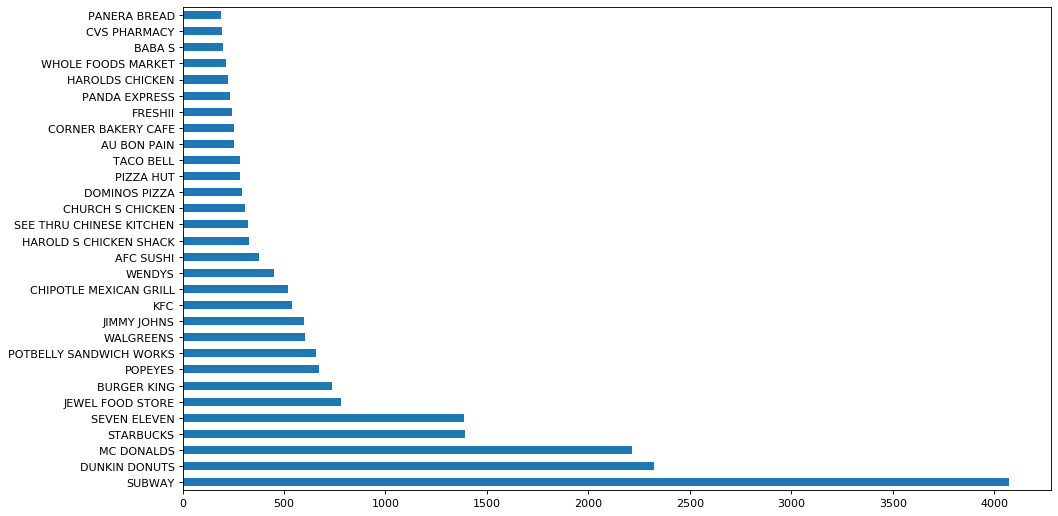

In [53]:
# Plot the 30 most appearning names
plt.figure(figsize=(14, 8), dpi = 80)
inspection_hist = inspection_data_eda['DBA Name'].value_counts().head(30).plot(kind='barh')

_We can see here that our plot represents well the most common food chains in Chicago. We could use this feature to rank big food chains by the food inspections results._

#### 1.3.3 : License \#  #

In [54]:
inspection_data_eda['License #'].value_counts().head(10)

0.0          490
1354323.0    192
14616.0      176
1574001.0     83
1974745.0     59
1142451.0     49
1884255.0     48
2083833.0     46
1490035.0     46
1596210.0     45
Name: License #, dtype: int64

_From here we can see that some businesses has 0.0 values with correspond to missing license._

_We can also see that many rows have the same license. This can be due either by many inspection of the same business or a business which has multiple restaurants._

In [55]:
inspection_data_eda[inspection_data_eda['License #'] == 1354323.0].head()

,Inspection ID,DBA Name,License #,Facility Type,Risk,Address,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude
122381,1375471,SPORTSERVICE SOLDIER FIELD,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,60605,2013-11-15T00:00:00.000,Canvass,Out of Business,NaN,41.862628,-87.615031
122387,1375472,SPORTSERVICE SOLDIER FIELD,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,60605,2013-11-15T00:00:00.000,Canvass,Out of Business,NaN,41.862628,-87.615031
122405,1375470,SPORTSERVICE SOLDIER FIELD,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,60605,2013-11-15T00:00:00.000,Canvass,Out of Business,NaN,41.862628,-87.615031
122421,1375475,SPORTSERVICE SOLDIER FIELD,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,60605,2013-11-15T00:00:00.000,Canvass,Out of Business,NaN,41.862628,-87.615031
122432,1375473,SPORTSERVICE SOLDIER FIELD,1354323.0,Restaurant,Risk 2 (Medium),1410 S MUSEUM CAMPUS DR,60605,2013-11-15T00:00:00.000,Canvass,Out of Business,NaN,41.862628,-87.615031


_We can see here that for this example, it is a problem of duplication for an inspection. Indeed, it is done at the same place, the same day, multiple times._

_Finally, in order to optimize our performances, as the licenses are int represented in float, let's convert them back to int._

In [56]:
inspection_data_eda['License #'] = inspection_data_eda['License #'].map(lambda x : int(x))

#### 1.3.4 : Facility Type

In [57]:
facility_type_counts = inspection_data_eda['Facility Type'].value_counts()

print("Number of types is : {n}".format(n = facility_type_counts.shape[0]))

facility_type_counts.head(30)

Number of types is : 479


Restaurant                         130488
Grocery Store                       24881
School                              12014
Children's Services Facility         3070
Bakery                               2834
Daycare (2 - 6 Years)                2676
Daycare Above and Under 2 Years      2396
Long Term Care                       1343
Catering                             1189
Liquor                                851
Mobile Food Dispenser                 782
Daycare Combo 1586                    747
Mobile Food Preparer                  597
Golden Diner                          557
Hospital                              542
Wholesale                             537
TAVERN                                286
Daycare (Under 2 Years)               252
Special Event                         208
Shared Kitchen User (Long Term)       172
BANQUET HALL                          124
GAS STATION                           120
Shared Kitchen                        110
Mobile Prepared Food Vendor       

_We can see her that the main type is Restaurant, from far. We also see that there is 479 different types inside this variable._

_As the number of rows per time decreases fast, we can create a new type called 'Other' that will aggregate all small type to end with 20 types._

In [58]:
top_facility_types = facility_type_counts.head(19).index.values

In [59]:
# Replace all small facility types by 'Other'
def compute_facility_type(type_name):
    if type_name in top_facility_types:
        return type_name
    else:
        return 'Other'

In [60]:
inspection_data_eda['Facility Type'] = inspection_data_eda['Facility Type'].map(lambda x : compute_facility_type(x))

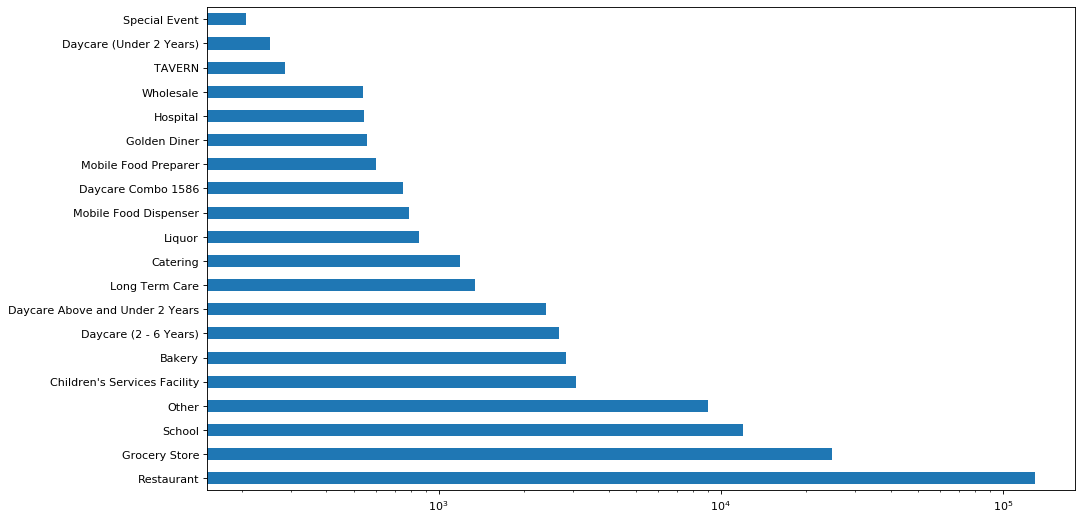

In [61]:
# Plot the 20 most appearning facility types
plt.figure(figsize=(14, 8), dpi = 80)
inspection_hist = inspection_data_eda['Facility Type'].value_counts().head(20).plot(kind='barh', logx=True)

_We have here a nice plot of the most appearing facility types for food in chicago. (Log scale !!)._

#### 1.3.5 : Risk

In [62]:
inspection_data_eda['Risk'].value_counts()

Risk 1 (High)      140188
Risk 2 (Medium)     38061
Risk 3 (Low)        16969
All                    31
Name: Risk, dtype: int64

_We could replace this feature by a numerical value. Indeed, we could apply the following mapping:_
- Risk 1 (High) : 3
- Risk 2 (Medium) : 2
- Risk 3 (Low) : 1
- All : 4

_This mapping would keep this order of magnitude of the diffent risks : All > High > Medium > Low_

In [63]:
# Transform the risk from categorical to numerical 
def compute_numerical_risk(risk):
    if 'All' in risk:
        return 4
    elif 'High' in risk:
        return 3
    elif 'Medium' in risk:
        return 2
    else:
        return 1

In [64]:
inspection_data_eda['Risk'] = inspection_data_eda['Risk'].map(compute_numerical_risk)

#### 1.3.6 : Address

_This is a difficult data to analyse. Most of the values are diffent. We will look at it later._

#### 1.3.7 : Zip

_This is a difficult data to analyse. Most of the values are diffent. We will look at it later._

#### 1.3.8 : Inspection Date

_Something we can do with the date is to transform it into 3 Day, Month, and Year features. It will then be easier for us to analyse it._

In [65]:
inspection_data_eda['Inspection Date'].head()

0    2019-12-04T00:00:00.000
1    2019-12-04T00:00:00.000
2    2019-12-04T00:00:00.000
3    2019-12-04T00:00:00.000
4    2019-12-04T00:00:00.000
Name: Inspection Date, dtype: object

In [66]:
# Create all date features
inspection_data_eda['Year'] = inspection_data_eda['Inspection Date'].apply(lambda x : int(x.split('-')[0]))
inspection_data_eda['Month'] = inspection_data_eda['Inspection Date'].apply(lambda x : int(x.split('-')[1]))
inspection_data_eda['Day'] = inspection_data_eda['Inspection Date'].apply(lambda x : int(x.split('-')[2].split('T')[0]))

# Remove useless inspection date feature 
del inspection_data_eda['Inspection Date']

In [67]:
def plot_date_elem(name):
    plt.figure(figsize=(14, 8), dpi = 80)
    inspections_per_x = inspection_data_eda[name].value_counts()
    inspections_per_x.index.values.sort()
    
    ax = inspections_per_x.plot(kind='barh', title='Number of inspections per {d}'.format(d=name))
    ax.set_xlabel('Number of inspection')
    ax.set_ylabel(name)
    plt.show()
    

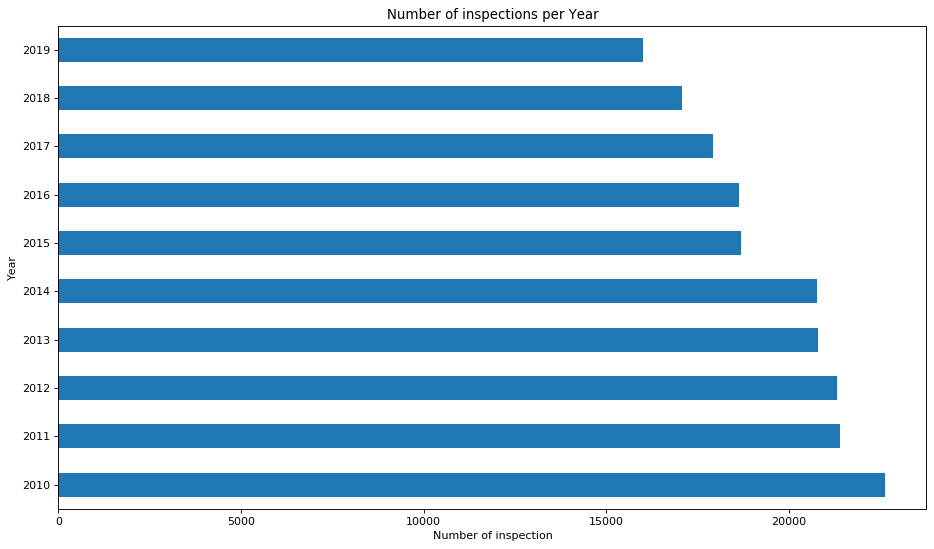

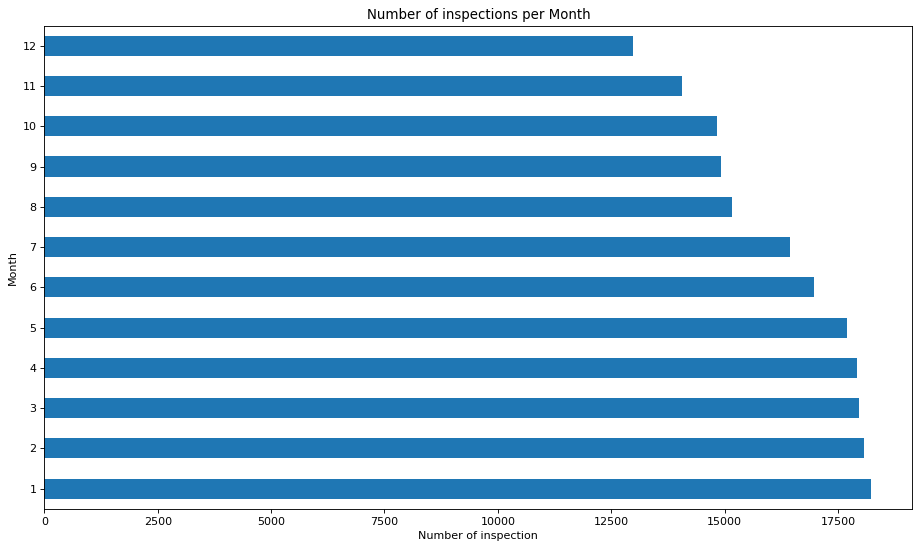

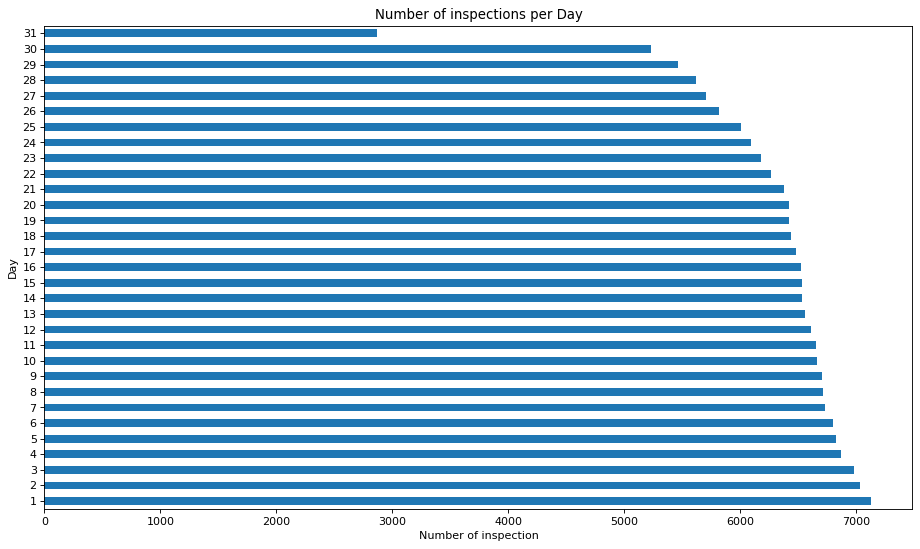

In [68]:
plot_date_elem('Year')
plot_date_elem('Month')
plot_date_elem('Day')

_This feature nows look much better and is easier to analyse._

#### 1.3.9 : Inspection Type


An inspection can be one of the following types: 
- canvass, the most common type of inspection performed at a frequency relative to the risk of the establishment; 
- consultation, when the inspection is done at the request of the owner prior to the opening of the establishment; 
- complaint, when the inspection is done in response to a complaint against the establishment; 
- license, when the inspection is done as a requirement for the establishment to receive its license to operate; 
- suspect food poisoning, when the inspection is done in response to one or more persons claiming to have gotten ill as a result of eating at the establishment (a specific type of complaint-based inspection); 
- task-force inspection, when an inspection of a bar or tavern is done. 
- Re-inspections can occur for most types of these inspections and are indicated as such.


In [69]:
inspection_data_eda['Inspection Type'].value_counts().head(20)

Canvass                                   103144
License                                    25762
Canvass Re-Inspection                      20565
Complaint                                  18126
License Re-Inspection                       8935
Complaint Re-Inspection                     7548
Short Form Complaint                        6747
Suspected Food Poisoning                     846
Consultation                                 662
Tag Removal                                  601
License-Task Force                           599
Recent Inspection                            333
Out of Business                              283
Task Force Liquor 1475                       252
Suspected Food Poisoning Re-inspection       190
Complaint-Fire                               157
Short Form Fire-Complaint                    112
No Entry                                      60
Special Events (Festivals)                    59
Complaint-Fire Re-inspection                  44
Name: Inspection Typ

_We can see here that there are multiple types of inspection. The main ones are Canvass, and License. We can also see that the 'Re-Inspection' qualifier can be added._  

_For now, the are not going to handle the different types of inspection. We are simply going to create a new feature called 'Re-Inspection' that will be either 0 if it is not a Re-Inspection and 1 if it is._

In [81]:
# Check if an inspeciton is a Re-Inspection
def is_reinspection(inspection):
    inspection = str(inspection).upper()
    if 'RE-INSPECTION' in inspection:
        return 1
    return 0

In [82]:
# Make the letters to upper case and remove the Re-Inspection term
def parse_inspection(inspection):
    inspection = str(inspection).upper()
    inspection = inspection.replace('RE-INSPECTION', '')
    return inspection.strip()

In [83]:
# Create the feature Re-Inpsection and remove it from the Inspectino Type feature. 
inspection_data_eda['Re-Inspection'] = inspection_data_eda['Inspection Type'].map(is_reinspection)
inspection_data_eda['Inspection Type'] = inspection_data_eda['Inspection Type'].map(parse_inspection)

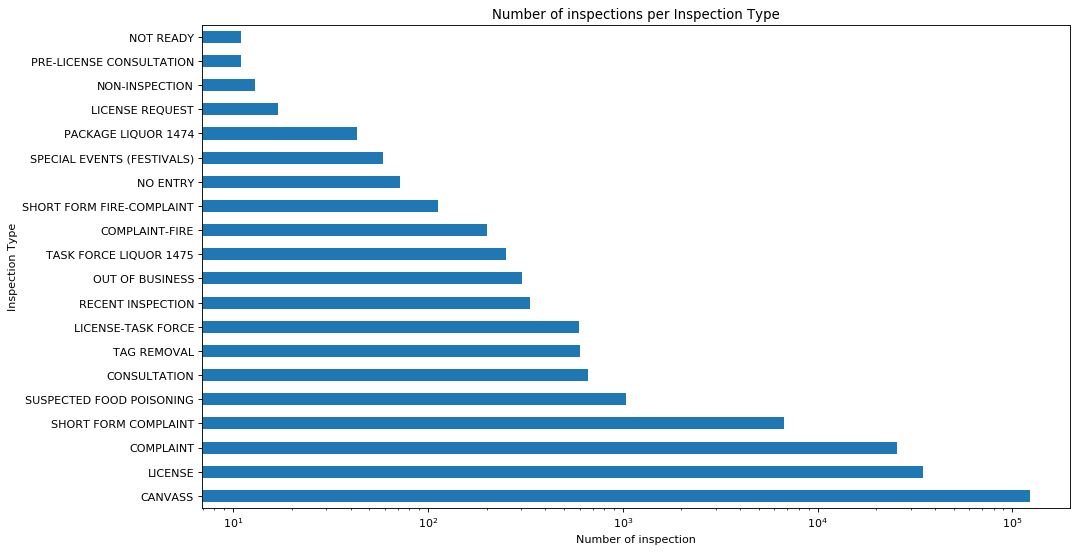

In [84]:
# Plot the 20 most common inspection type
most_common_inspections_count = inspection_data_eda['Inspection Type'].value_counts().head(20)
plt.figure(figsize=(14, 8), dpi = 80)
    
ax = most_common_inspections_count.plot(kind='barh', title='Number of inspections per Inspection Type', logx=True)
ax.set_xlabel('Number of inspection')
ax.set_ylabel('Inspection Type')
plt.show()

Text(0, 0.5, '')

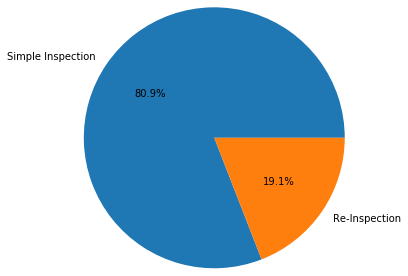

In [85]:
# Show the proportion of Re-Inspection for all inspections :
reinspection_count = inspection_data_eda['Re-Inspection'].value_counts()
ax = reinspection_count.plot(kind='pie', labels= ['Simple Inspection', 'Re-Inspection'], autopct='%1.1f%%',  radius=1.5)
ax.set_ylabel('')

#### 1.3.10 : Results

An inspection can pass, pass with conditions or fail. Establishments receiving a ‘pass’ were found to have no critical or serious violations (violation number 1-14 and 15-29, respectively). Establishments receiving a ‘pass with conditions’ were found to have critical or serious violations, but these were corrected during the inspection. Establishments receiving a ‘fail’ were found to have critical or serious violations that were not correctable during the inspection. An establishment receiving a ‘fail’ does not necessarily mean the establishment’s licensed is suspended. Establishments found to be out of business or not located are indicated as such.

Text(0, 0.5, '')

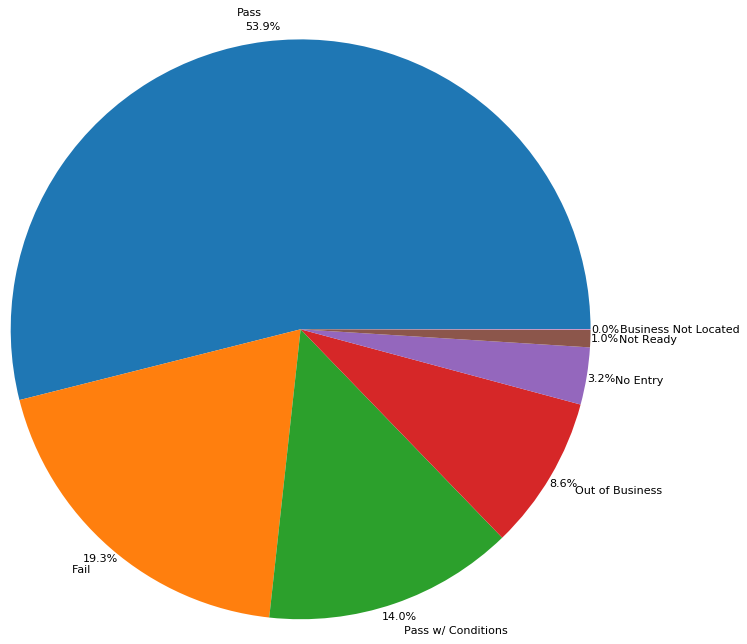

In [86]:
plt.figure(figsize=(14, 8), dpi = 80)
inspection_result_counts = inspection_data_eda['Results'].value_counts()
ax = inspection_result_counts.plot(kind='pie', labels= inspection_result_counts.index, autopct='%1.1f%%', pctdistance=1.05, radius=1.5)
ax.set_ylabel('')

_The data here looks really good, we are going to let it like that for now._

#### 1.3.11 : Violations

An establishment can receive one or more of 45 distinct violations (violation numbers 1-44 and 70). For each violation number listed for a given establishment, the requirement the establishment must meet in order for it to NOT receive a violation is noted, followed by a specific description of the findings that caused the violation to be issued. 

In [87]:
inspection_data_eda['Violations'].value_counts().head()

32. FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED - Comments: VIOLATION STILL PENDING                                                                                                                                                                                                                                                                                                                                                                                                                                                             11
30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABELED: CUSTOMER ADVISORY POSTED AS NEEDED - Comments: OBSERVED NO DBA NAME ON THE LATERAL SIDE OF THE CART, INSTRUCTED TO PROVIDE BUSINESS NAME LEGIBLY PAINTED IN LETTERS AT LEAST TWO INCHES IN HEIGHT IN A CONSPICUOUS PLACE ON EACH LATERAL SIDE OF CART.                                                                                                                                        

_We can distinguish a pattern of the data:_ 

- Violation : [Violation number]. [Violation description] - Comments : [Comment content]
- Separator between Violations : |

For now, we are going to ignore the comments because it is difficult to handle. We are going to : 
- Create a mapping between Violation number and Violation description
- Replace all the Violations features by a list of id corresponding to violations.

In [88]:
# Compute a dictionary of Violation Id to Violation description.
def compute_violations_mapping(all_violations):
    violations_mapping = {}
    # Interate over all inspections
    for v in all_violations:
        # Get a list of violations from one inspection
        listed_violations = extract_violation(v)
        for v2 in listed_violations:
            if v2[0] not in violations_mapping:
                violations_mapping[v2[0]] =  v2[1]
    return violations_mapping
        
        
        
# Get a list of violations type from the string of a violation feature.
def extract_violation(violation):
    
    result = []
    
    if (isinstance(violation, str)):
        
        violation_list = violation.split(' | ')
    
        for v in violation_list:
            # Get the different parameters for one violation type
            violation_params = v.split(' - Comments: ')
            violation_id = int(violation_params[0].split('.')[0])
            violation_text = violation_params[0].replace(str(violation_id) + '. ', '')
            if len(violation_params) > 1:
                violation_comment = violation_params[1]
            else:
                violation_comment = ''
        
            result.append([violation_id, violation_text, violation_comment])
    
    return result
    
    

In [89]:
# Compute the Violations dictionary
violations_mapping = compute_violations_mapping(inspection_data_eda['Violations'])
violations_data_type = pd.DataFrame.from_dict(violations_mapping, orient='index', columns=['Violation Description'])
violations_data_type = violations_data_type.sort_index()

In [90]:
violations_data_type.head()

,Violation Description
1,"PERSON IN CHARGE PRESENT, DEMONSTRATES KNOWLED..."
2,CITY OF CHICAGO FOOD SERVICE SANITATION CERTIF...
3,"MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPL..."
4,PROPER USE OF RESTRICTION AND EXCLUSION
5,PROCEDURES FOR RESPONDING TO VOMITING AND DIAR...


_Now we have a nice registery of all possibles Violations, we can therefore now store only the Violations ids._

In [91]:
# Transform the violation feature from a string to a list of violation id.
def compute_new_violations_lists(violation):
    result = []
    if (isinstance(violation, str)):
        elements = extract_violation(violation)
        for e in elements:
            result.append(e[0])
    return result

In [92]:
inspection_data_eda['Violations'] = inspection_data_eda['Violations'].map(compute_new_violations_lists)

In [93]:
inspection_data_eda['Violations'].head(10)

0                       [3]
1      [10, 47, 49, 55, 55]
2                        []
3    [3, 5, 16, 51, 53, 58]
4                        []
5                        []
6                        []
7           [5, 36, 51, 53]
8              [49, 55, 56]
9                        []
Name: Violations, dtype: object

_Now, our violations list are represented in a more elegant was and are simpler. We set the null values to empty lists._

_Let's count the number of time a violation were signaled:_

In [94]:
# Create a dictionary that the counts per violation type.
def build_inspection_count(all_inspections):
    count = {}
    for inspection_list in all_inspections:
        for inspection_id in inspection_list:
            if inspection_id not in count:
                count[inspection_id] = 1
            else:
                count[inspection_id] += 1
    return count;

In [95]:
inspection_count = build_inspection_count(inspection_data_eda['Violations'])

In [96]:
inspection_count_data = pd.DataFrame.from_dict(inspection_count, orient='index', columns=['Count per Violation'])
inspection_count_data = inspection_count_data.sort_index()

<Figure size 1120x640 with 0 Axes>

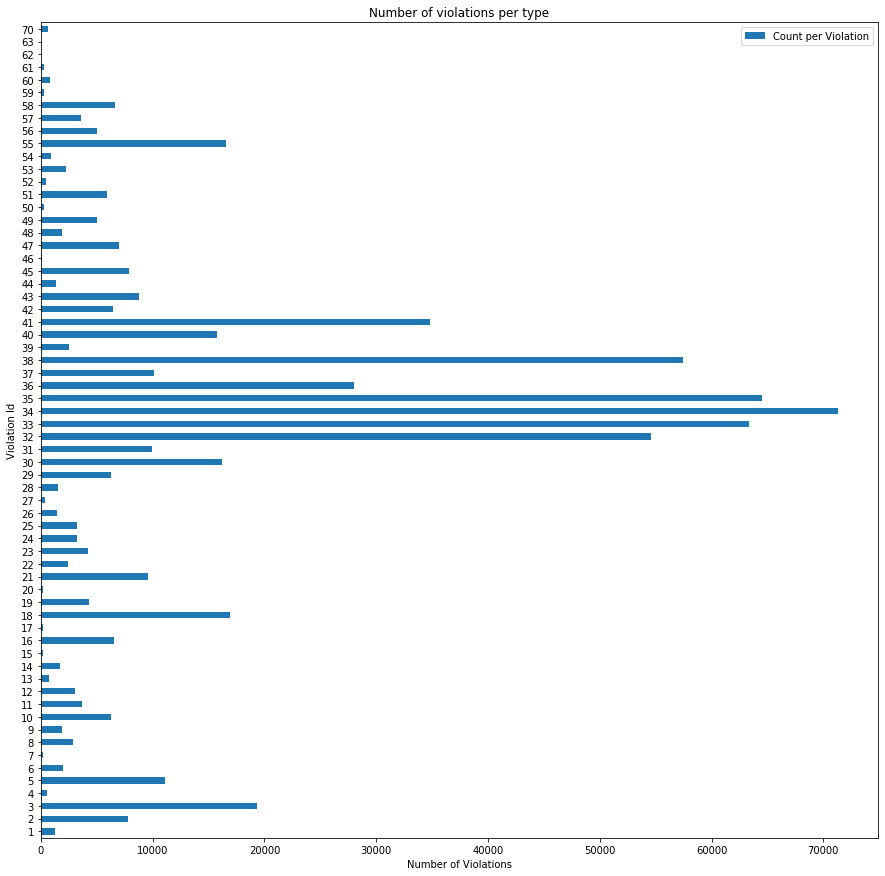

In [97]:
plt.figure(figsize=(14, 8), dpi = 80)
ax = inspection_count_data.plot(kind='barh', figsize=(15, 15), title='Number of violations per type')
ax.set_xlabel('Number of Violations')
ax.set_ylabel('Violation Id')
plt.show()

#### 1.3.12 : Latitude, Longitude

_With the latitude and longitude, we can plot the map of inspections in Chicago during the last 10 years._


Our map should fit well with the Chicago city map :_

![image](https://previews.123rf.com/images/lesniewski/lesniewski1411/lesniewski141100002/33253618-chicago-neighborhood-map.jpg)

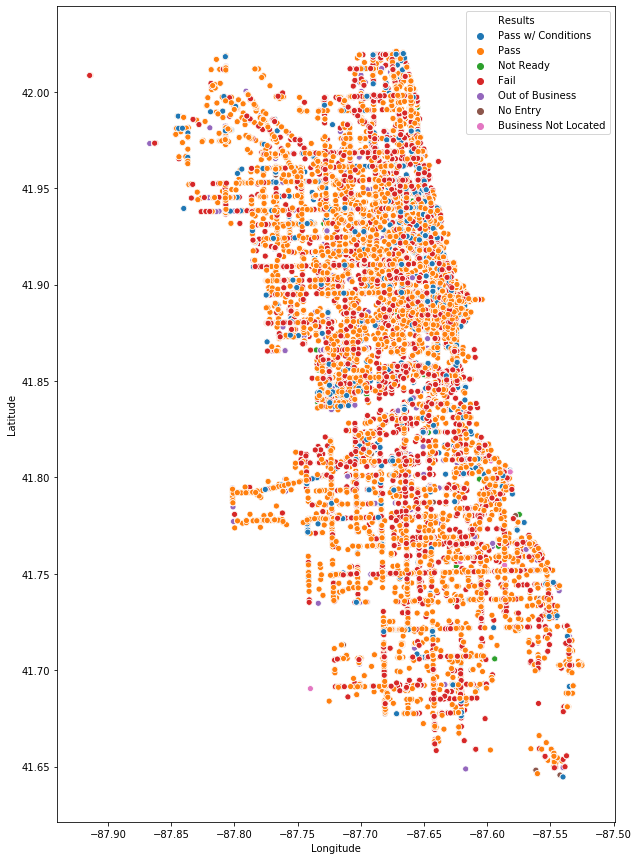

In [99]:
plt.figure(figsize=(10, 15))
sns.scatterplot(x='Longitude',y='Latitude', hue='Results' ,data=inspection_data_eda)

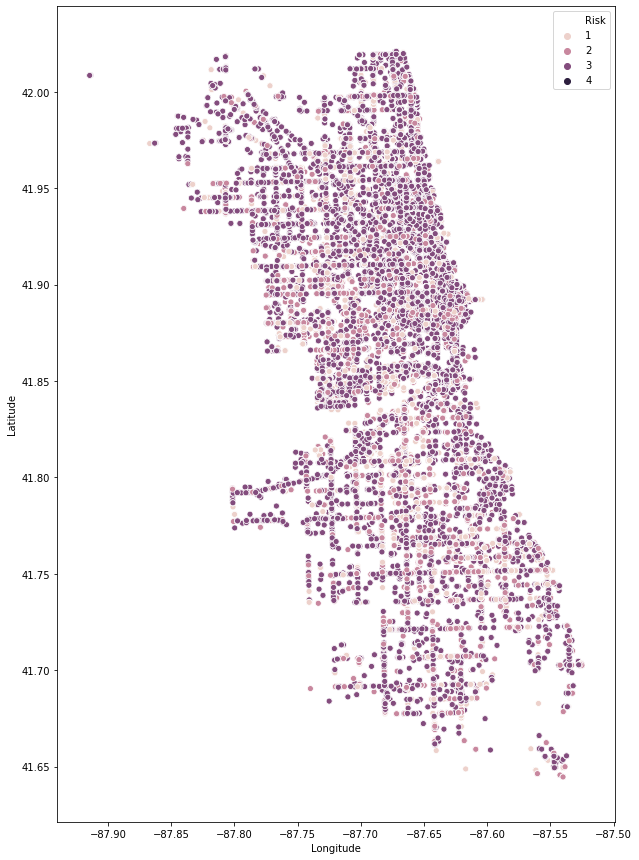

In [101]:
plt.figure(figsize=(10, 15))
sns.scatterplot(x='Longitude',y='Latitude', hue='Risk' ,data=inspection_data_eda)

In [102]:
failed_inspections = inspection_data_eda[inspection_data_eda['Results'] == 'Fail']

Text(0.5, 1.0, 'Map of failed inspection')

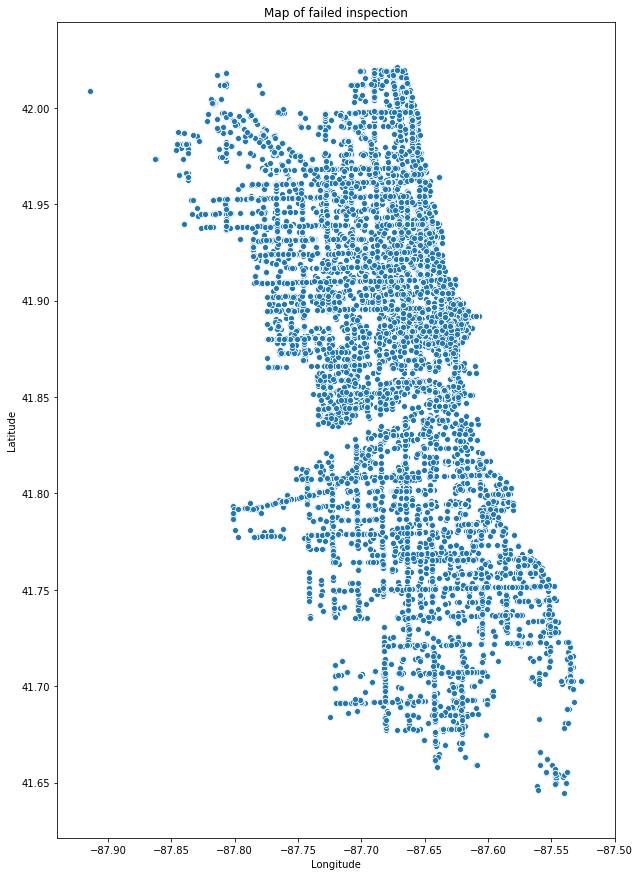

In [103]:
plt.figure(figsize=(10, 15))
sns.scatterplot(x='Longitude',y='Latitude', data = failed_inspections )
plt.title('Map of failed inspection')

Text(0.5, 1.0, 'Map of passed inspection')

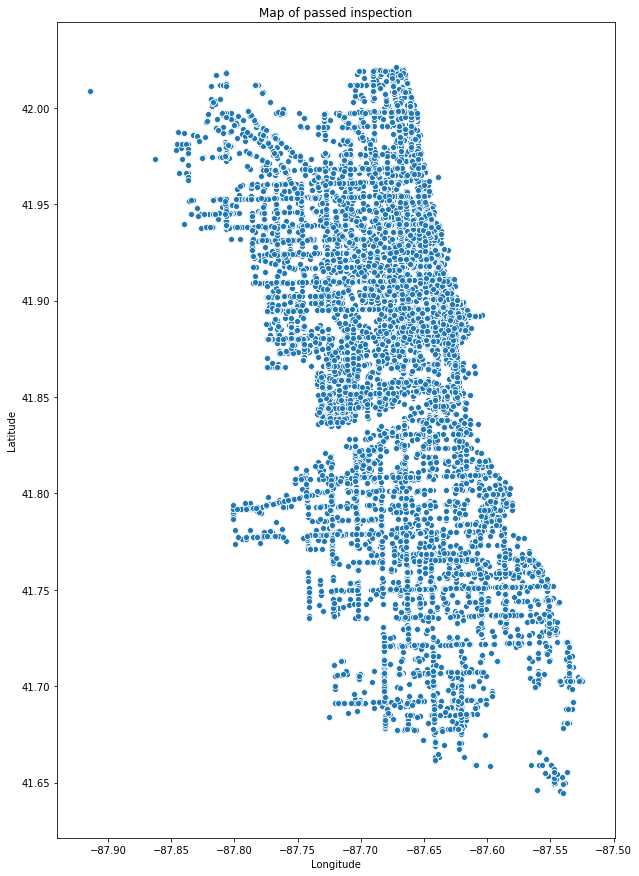

In [104]:
passed_inspections = inspection_data_eda[inspection_data_eda['Results'] == 'Pass']
plt.figure(figsize=(10, 15))
sns.scatterplot(x='Longitude',y='Latitude', data = passed_inspections )
plt.title('Map of passed inspection')

_Now that we have made an analysis of the different features of our dataset, let's look at the different correlation betweent the features:_

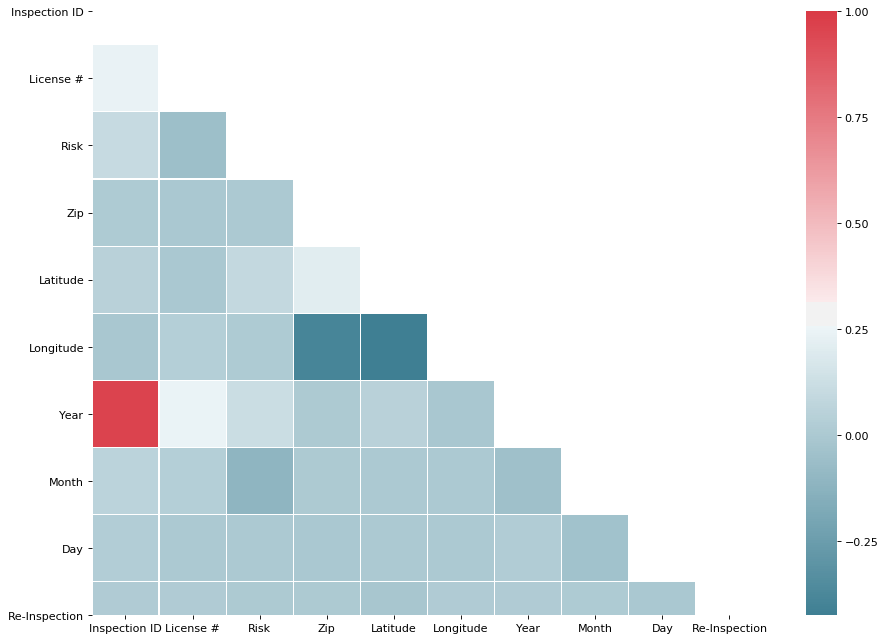

In [105]:
# Create the matrix and the figure.
f, ax = plt.subplots(figsize = (14, 10), dpi = 80)
corr = inspection_data_eda.corr()

# Create the mask to hide the duplicated cells.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Create the heatmap with the correlation matrix data
sns.heatmap(corr,
            mask = mask,
            cmap = sns.diverging_palette(220, 10, as_cmap = True),
            square = True,
            linewidths = 0.2,
            ax = ax)
plt.show()

### 1.4 Remove duplicates

In [106]:
inspection_data_drop = inspection_data_eda.copy()

_Now that our data is cleaner and smaller, we would like to remove the duplicated rows that are useless._

In order to do that, we need to find the duplicates. As we saw before, there are multiple ways to find duplicated inspection :

- Same Inspection ID
- Inspection happening at the same place the same day with the same inspection type. 


For now we are going to look only for those conditions and remove the duplicated values.

In [107]:
# Drop the duplicated inspection ID 
inspection_data_drop.drop_duplicates(subset ="Inspection ID", 
                     keep = False, inplace = True) 

In [108]:
inspection_data_drop["Inspection ID"].value_counts().head()

2099199    1
1561936    1
1279322    1
2071897    1
2069848    1
Name: Inspection ID, dtype: int64

_We can see here that we have removed the duplicated inspection ID. Let's now remove the duplicated inspection with different ids._

In [109]:
inspection_data_drop.duplicated(subset=['Year', 'Month', 'License #', 'Inspection Type', 'Re-Inspection', 'Results']).value_counts()

False    193100
True       1855
dtype: int64

_We can see here that we have many duplicated values regarding the listed columns above. We are going to remove them because they correspond to erroneous entries in the dataset._

In [110]:
inspection_data_drop.drop_duplicates(subset=['Year', 'Month', 'License #', 'Inspection Type', 'Re-Inspection', 'Results'],
                     keep = False, inplace = True)

In [111]:
inspection_data_drop['License #'].value_counts().head()

0          260
1884255     48
1142451     47
1596210     45
2083833     44
Name: License #, dtype: int64

_Now, our data looks pretty good, we have removes many duplicated values, cleaned our features, dropped the useless ones as well as replaced most of the missing values. Let's have a final overview of it._

In [112]:
final_inspection_data = inspection_data_drop.copy()

In [113]:
final_inspection_data.dtypes

Inspection ID        int64
DBA Name            object
License #            int64
Facility Type       object
Risk                 int64
Address             object
Zip                  int64
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Year                 int64
Month                int64
Day                  int64
Re-Inspection        int64
dtype: object

_For the purpose of our analysis, we are doing to drop the features 'Inspection ID' and 'Address'._

In [114]:
del final_inspection_data['Inspection ID']
del final_inspection_data['Address']

In [115]:
final_inspection_data.describe()

,License #,Risk,Zip,Latitude,Longitude,Year,Month,Day,Re-Inspection
count,1.918300e+05,191830.000000,191830.000000,191336.000000,191336.000000,191830.000000,191830.000000,191830.000000,191830.000000
mean,1.603725e+06,2.634703,60628.863436,41.881199,-87.676345,2014.492113,6.495929,15.830647,0.189553
std,8.948504e+05,0.636585,17.600993,0.080930,0.058486,2.749106,3.334078,8.587552,0.391948
min,0.000000e+00,1.000000,60601.000000,41.644670,-87.914428,2010.000000,1.000000,1.000000,0.000000
25%,1.226310e+06,2.000000,60614.000000,41.834422,-87.707129,2012.000000,4.000000,8.000000,0.000000
50%,1.980111e+06,3.000000,60625.000000,41.891725,-87.666637,2015.000000,6.000000,16.000000,0.000000
75%,2.241029e+06,3.000000,60643.000000,41.939930,-87.634955,2017.000000,9.000000,23.000000,0.000000
max,9.999999e+06,4.000000,60666.000000,42.021064,-87.525094,2019.000000,12.000000,31.000000,1.000000


In [116]:
# Count the number of missing values
final_inspection_data.isnull().sum()

DBA Name             0
License #            0
Facility Type        0
Risk                 0
Zip                  0
Inspection Type      0
Results              0
Violations           0
Latitude           494
Longitude          494
Year                 0
Month                0
Day                  0
Re-Inspection        0
dtype: int64

_Let's drop the last missing values._

In [117]:
final_inspection_data = final_inspection_data.dropna(subset=['Latitude', 'Longitude'])

In [119]:
import pickle
final_inspection_data.to_pickle('./data/chicago-food-inspections/food_inspections_clean.pickle')

# Taxi Rides Dataset <a name="taxi-rides"/>


### Abstract:
This dataset contains taxi rides data such as the location of picking and dropping, time of the course. This would allow us to see which areas of the city are well connected and which areas tend to be excluded. We can then try to correlate the results with the violent areas. However, this analysis can only be possible for the 2016 year.

### Notes:
This dataset is made publicly available by the city of chicago [here](https://www.kaggle.com/chicago/chicago-taxi-rides-2016)

### 0. Data Loading <a name="data-loading-3"/>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pickle

In [8]:
CHICAGO_TAXI_RIDES_PATH = "./data/chicago-taxi-rides-2016/"

In [3]:
# Generate all the paths to query the data
all_df = []

init_path = CHICAGO_TAXI_RIDES_PATH + "chicago_taxi_trips_2016_"
for i in range (1,13):
    # Append the month to the path
    path = init_path + "{:02d}".format(i) + ".csv"
    # Read the file at the given path
    file_data = pd.read_csv(path)
    # Add the content a list of files content
    all_df.append(file_data)

In [4]:
data = pd.concat(all_df)

### 1. Data Overview <a name="data-overview-3"/>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19866157 entries, 0 to 1245711
Data columns (total 20 columns):
taxi_id                   float64
trip_start_timestamp      object
trip_end_timestamp        object
trip_seconds              float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
pickup_community_area     float64
dropoff_community_area    float64
fare                      float64
tips                      float64
tolls                     float64
extras                    float64
trip_total                float64
payment_type              object
company                   float64
pickup_latitude           float64
pickup_longitude          float64
dropoff_latitude          float64
dropoff_longitude         float64
dtypes: float64(17), object(3)
memory usage: 3.1+ GB


In [6]:
data.shape

(19866157, 20)

In [7]:
data = data.drop(columns= ["trip_seconds", "trip_miles", "pickup_census_tract", "dropoff_census_tract", "fare", "tips", "tolls", "extras", "trip_total", "payment_type", "company"])

In [8]:
data.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,pickup_community_area,dropoff_community_area,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,24.0,24.0,199.0,510.0,199.0,510.0
1,2776.0,2016-1-22 09:30:00,2016-1-22 09:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2,3168.0,2016-1-31 21:30:00,2016-1-31 21:30:00,NaN,NaN,NaN,NaN,NaN,NaN
3,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,6.0,6.0,686.0,500.0,686.0,500.0
4,5710.0,2016-1-14 05:45:00,2016-1-14 06:00:00,32.0,NaN,385.0,478.0,NaN,NaN


In [9]:
import pickle

# If file exists then load it
try:
    taxi_rides_init = pickle.load(open(CHICAGO_TAXI_RIDES_PATH + "taxi_rides_init.pickle", "rb"))
# Otherwise create it
except (OSError, IOError) as e:
    taxi_rides_init = data
    pickle.dump(taxi_rides_init, open(CHICAGO_TAXI_RIDES_PATH + "taxi_rides_init.pickle", "wb"))

_Let's look at the types of the data:_

In [10]:
taxi_rides_init.dtypes

taxi_id                   float64
trip_start_timestamp       object
trip_end_timestamp         object
pickup_community_area     float64
dropoff_community_area    float64
pickup_latitude           float64
pickup_longitude          float64
dropoff_latitude          float64
dropoff_longitude         float64
dtype: object

In [11]:
taxi_rides_init.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,pickup_community_area,dropoff_community_area,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,24.0,24.0,199.0,510.0,199.0,510.0
1,2776.0,2016-1-22 09:30:00,2016-1-22 09:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2,3168.0,2016-1-31 21:30:00,2016-1-31 21:30:00,NaN,NaN,NaN,NaN,NaN,NaN
3,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,6.0,6.0,686.0,500.0,686.0,500.0
4,5710.0,2016-1-14 05:45:00,2016-1-14 06:00:00,32.0,NaN,385.0,478.0,NaN,NaN


_We can see here that a lot of types could be simplified using integers. We can also parse the different times as well as trip times. Also, there is some null values in the data. Let's have a look at it._

In [12]:
taxi_rides_init.isnull().sum()

taxi_id                      2933
trip_start_timestamp            0
trip_end_timestamp           2413
pickup_community_area     2755980
dropoff_community_area    3086050
pickup_latitude           2755600
pickup_longitude          2755600
dropoff_latitude          3047662
dropoff_longitude         3047662
dtype: int64

### 2. Data Cleaning <a name="data-cleaning-3"/>

In [13]:
# Convert the latitude and longitude features into their actual values.
def convert_coord(coord, nb):
    s = str(coord)
    res=""
    if nb == 1:
        res = "41.8"+s.split('.')[0]+s.split('.')[1]
    else: 
        res = "-87.6"+s.split('.')[0]+ s.split('.')[1]
    return float(res)

_We have a lot of null values. As we are really interested in the locations, we are going to drop the entries that have missing values._

In [14]:
taxi_rides_init = taxi_rides_init.dropna(subset=['taxi_id', 'pickup_community_area',
                                                 'dropoff_community_area',
                                                 'pickup_latitude',
                                                 'pickup_longitude', 
                                                 'dropoff_latitude',
                                                 'dropoff_longitude'])

In [15]:
# Convert the string time into datatime objects
taxi_rides_init.trip_start_timestamp = pd.to_datetime(taxi_rides_init.trip_start_timestamp, format='%Y-%m-%d %H:%M:%S')
taxi_rides_init.trip_end_timestamp = pd.to_datetime(taxi_rides_init.trip_end_timestamp, format='%Y-%m-%d %H:%M:%S')

In [16]:
# Compute time features using the datetime ones.
taxi_rides_init['month'] = taxi_rides_init.trip_start_timestamp.apply(lambda x: x.month)
taxi_rides_init['day'] = taxi_rides_init.trip_start_timestamp.apply(lambda x: x.day)
taxi_rides_init['start_hour'] = taxi_rides_init.trip_start_timestamp.apply(lambda x: x.hour)

In [17]:
# Create a duration feature
taxi_rides_init['duration'] = (taxi_rides_init.trip_end_timestamp 
                               - taxi_rides_init.trip_start_timestamp).apply(lambda x : x.total_seconds())

In [18]:
# Replace the latitude and longitude 
taxi_rides_init['pickup_latitude'] = taxi_rides_init['pickup_latitude'].apply(lambda x: convert_coord(x, 1))
taxi_rides_init['pickup_longitude'] = taxi_rides_init['pickup_longitude'].apply(lambda x: convert_coord(x, 2))
taxi_rides_init['dropoff_latitude'] = taxi_rides_init['dropoff_latitude'].apply(lambda x: convert_coord(x, 1))
taxi_rides_init['dropoff_longitude'] = taxi_rides_init['dropoff_longitude'].apply(lambda x: convert_coord(x, 2))

_Now let's have a look at our new data to see how clean it is._

_Something that we can do is replace the data types to reduce the size of the data in memory._

In [19]:
taxi_rides_init.head()

,taxi_id,trip_start_timestamp,trip_end_timestamp,pickup_community_area,dropoff_community_area,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,month,day,start_hour,duration
0,85.0,2016-01-13 06:15:00,2016-01-13 06:15:00,24.0,24.0,41.8199,-87.6510,41.8199,-87.6510,1,13,6,0.0
3,4237.0,2016-01-23 17:30:00,2016-01-23 17:30:00,6.0,6.0,41.8686,-87.6500,41.8686,-87.6500,1,23,17,0.0
5,1987.0,2016-01-08 18:15:00,2016-01-08 18:45:00,8.0,3.0,41.8599,-87.6346,41.8660,-87.6120,1,8,18,1800.0
7,6400.0,2016-01-26 04:15:00,2016-01-26 04:15:00,16.0,16.0,41.8527,-87.6240,41.8527,-87.6240,1,26,4,0.0
8,7418.0,2016-01-22 11:30:00,2016-01-22 11:45:00,8.0,32.0,41.8210,-87.6470,41.8744,-87.6605,1,22,11,900.0


In [20]:
taxi_rides_init.dtypes

taxi_id                          float64
trip_start_timestamp      datetime64[ns]
trip_end_timestamp        datetime64[ns]
pickup_community_area            float64
dropoff_community_area           float64
pickup_latitude                  float64
pickup_longitude                 float64
dropoff_latitude                 float64
dropoff_longitude                float64
month                              int64
day                                int64
start_hour                         int64
duration                         float64
dtype: object

In [21]:
# Convert the types to reduce the size of the dataset.
taxi_rides_init['taxi_id'] = taxi_rides_init['taxi_id'].apply(lambda x : int(x))
taxi_rides_init['pickup_community_area'] = taxi_rides_init['pickup_community_area'].apply(lambda x : int(x))
taxi_rides_init['dropoff_community_area'] = taxi_rides_init['dropoff_community_area'].apply(lambda x : int(x))
taxi_rides_init['duration'] = taxi_rides_init['duration'].apply(lambda x : int(x))

In [22]:
taxi_rides_init['duration'].value_counts().head(10)

900     8086352
0       6046981
1800    1622074
2700     574762
3600     210229
4500      62017
5400      16472
6300       5095
7200       2406
8100       1539
Name: duration, dtype: int64

_We can see that a lot of drives have a duration of 0 minutes. Some have negative durations too. We can consider that those drives are erroneous and will therefore delete them._

In [23]:
taxi_rides_init = taxi_rides_init[taxi_rides_init['duration'] > 0]

In [24]:
taxi_rides_init['duration'].value_counts().head()

900     8086352
1800    1622074
2700     574762
3600     210229
4500      62017
Name: duration, dtype: int64

In [25]:
# Delete dates features that are now useless.
del taxi_rides_init['trip_start_timestamp']
del taxi_rides_init['trip_end_timestamp']

_Now that our data is cleaner, let's looks at the number of taxis drive per comminity areas in chicago._

### 3. Exploratory Data Analysis <a name="eda-3"/>

In [10]:
# First, let's save the data in a pickle file that we can reuse in the future
# If file exists then load it
try:
    taxi_rides = pickle.load(open(CHICAGO_TAXI_RIDES_PATH + "taxi_rides.pickle", "rb"))
# Otherwise create it
except (OSError, IOError) as e:
    taxi_rides = taxi_rides_init
    pickle.dump(taxi_rides, open(CHICAGO_TAXI_RIDES_PATH + "taxi_rides.pickle", "wb"))

In [13]:
community_area_min = min(np.min(taxi_rides["pickup_community_area"]), np.min(taxi_rides["dropoff_community_area"]))
community_area_max = max(np.max(taxi_rides["pickup_community_area"]), np.max(taxi_rides["dropoff_community_area"]))
community_area_range = int(community_area_max - community_area_min)
community_area_range

76

Text(0.5, 0, 'Community area')

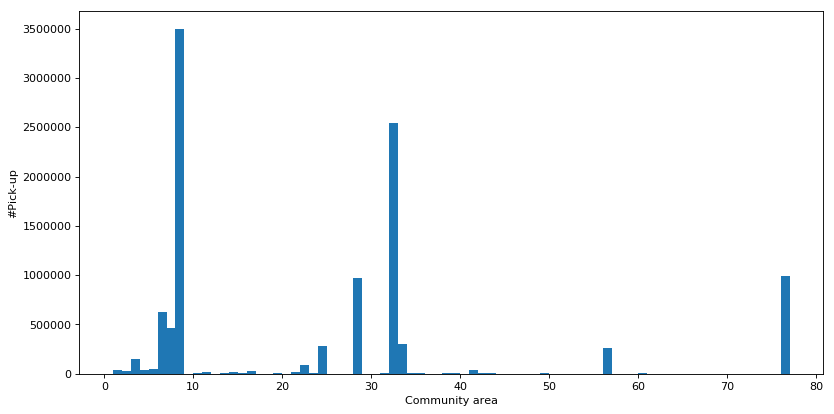

In [14]:
# Plot the number of pickups per community area
plt.figure(figsize=(12, 6), dpi = 80)
ax, _, _ = plt.hist(taxi_rides["pickup_community_area"], bins = community_area_range)
plt.ylabel('#Pick-up')
plt.xlabel('Community area')

_From the plot above, we can see that only a few community areas have much more taxi rides departure than others. A guess could be that those areas are either rich residence, very urban areas, or transport areas (ex. Airport, Train station, ..)._


_Let's now have a look at the dropoff_\__community_\__areas:_ 

Text(0.5, 0, 'Community area')

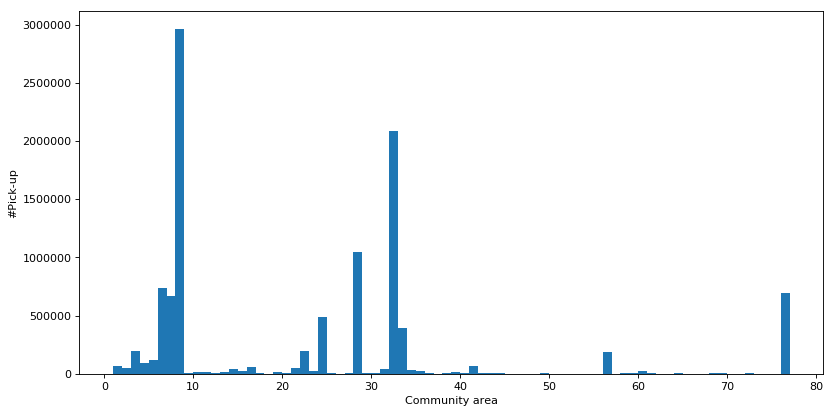

In [15]:
# Plot the number of dropoff per community area
plt.figure(figsize=(12, 6), dpi = 80)
ax, _, _ = plt.hist(taxi_rides["dropoff_community_area"], bins = community_area_range)
plt.ylabel('#Pick-up')
plt.xlabel('Community area')

_Let's look at the sum between pickup and drop off areas to look at the most and least frequented areas._

In [16]:
total_area_frequency = taxi_rides["pickup_community_area"].value_counts() + taxi_rides["dropoff_community_area"].value_counts()

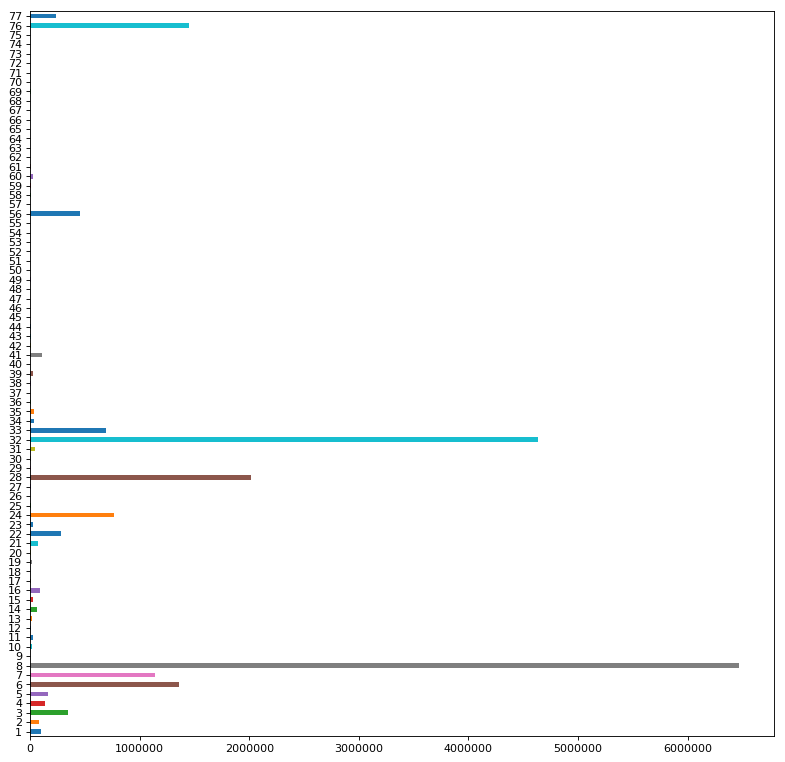

In [17]:
# Plot the total number of pickups/dropoff per community area
plt.figure(figsize=(12, 12), dpi = 80)
total_area_frequency.plot(kind='barh')

_We can see here that the important pickup and dropoff areas are the same._

_Let's look at the relationship between pickup and dropoff areas:_

In [18]:
taxi_rides["pickup_community_area"].value_counts().head()

8     3499130
32    2547472
28     970935
76     894988
6      622094
Name: pickup_community_area, dtype: int64

In [19]:
np.sort(taxi_rides["pickup_community_area"].value_counts().index)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77])

_Let's select the main taxis areas and show them on a map. We are fixing a thereshold to more than 200000 trips._

In [20]:
# Get a list of the main taxi rides areas
main_areas = taxi_rides["pickup_community_area"].value_counts().where(lambda x : x > 200000).dropna().index.values
main_areas

array([ 8, 32, 28, 76,  6,  7, 33, 24, 56])

_We are also going to have a look to the least frequented areas:_

In [32]:
least_areas = taxi_rides["pickup_community_area"].value_counts().tail(10).index.values
least_areas

array([50, 75,  9, 72, 53, 47, 55, 52, 54, 74])

In [22]:
taxi_main_areas_rides = taxi_rides[taxi_rides['pickup_community_area'].apply(lambda x : x in main_areas)]

In [23]:
taxi_main_areas_rides.shape

(9842959, 11)

In [24]:
taxi_least_areas_rides = taxi_rides[taxi_rides['pickup_community_area'].apply(lambda x: x in least_areas)]

In [37]:
1 in least_areas

False

In [45]:
least_area_frequency = total_area_frequency[total_area_frequency.index.map(lambda x : x in least_areas)]

In [55]:
main_area_frequency = total_area_frequency[total_area_frequency.index.map(lambda x : x in main_areas)]

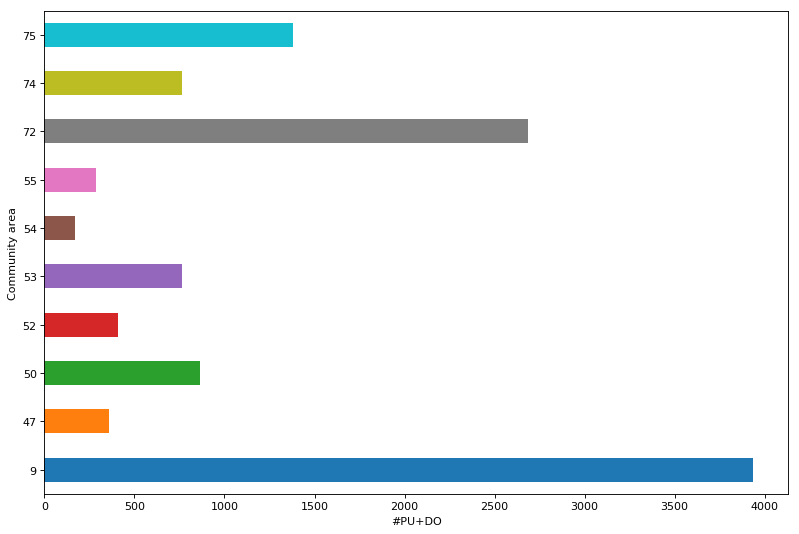

In [46]:
# Plot the less frequented areas
plt.figure(figsize=(12, 8), dpi = 80)
p = least_area_frequency.plot(kind = 'barh')
p.set_ylabel("Community area")
p.set_xlabel('#PU+DO')
plt.show()

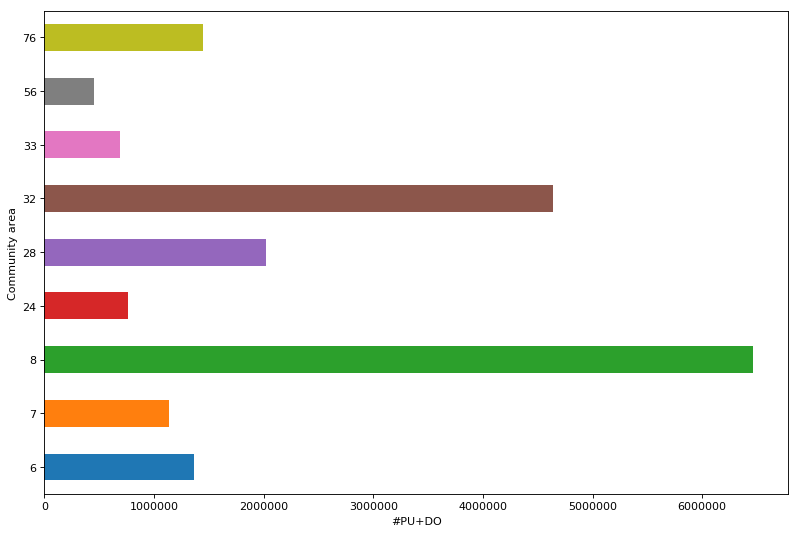

In [56]:
# Plot the most frequented areas
plt.figure(figsize=(12, 8), dpi = 80)
p = main_area_frequency.plot(kind = 'barh')
p.set_ylabel("Community area")
p.set_xlabel('#PU+DO')
plt.show()

I'm going to stick with the 4 less frequented areas wich are : 
- RIVERDALE
- HEGEWISH
- EAST SIDE
- BURNSIDE

In [57]:
most_freq = main_area_frequency.index # most frequented areas without first two to have more significant results
less_freq = [54, 55, 52, 47] # 4 less frequented areas

In [53]:
less_freq_pu = taxi_rides[taxi_rides["pickup_community_area"].isin(less_freq)]

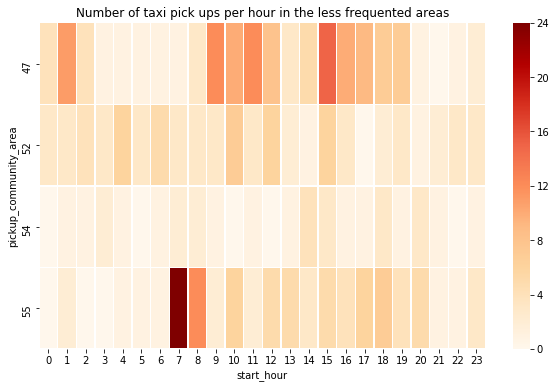

In [54]:
hour_pu = less_freq_pu[["pickup_community_area","start_hour","taxi_id"  ]].groupby(["pickup_community_area", "start_hour"]).count()
hour_pu = hour_pu.rename(columns={'taxi_id':'Count'})
hour_pu = hour_pu.reset_index()
hour_pu = hour_pu.pivot("pickup_community_area","start_hour","Count").fillna(0)
fig, ax = plt.subplots(figsize=(10,6))      
plt.title("Number of taxi pick ups per hour in the less frequented areas")
sns.heatmap(hour_pu, linewidths=.5, ax=ax, cmap="OrRd")

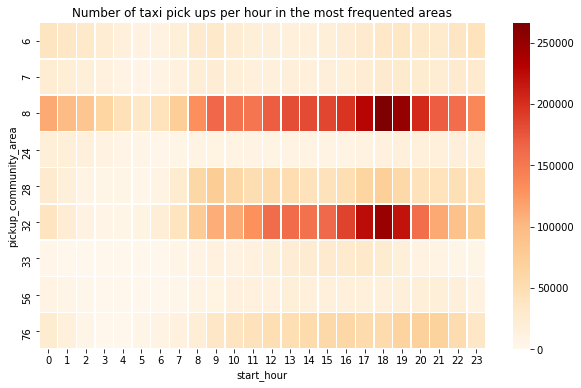

In [58]:
most_freq_pu = taxi_rides[taxi_rides["pickup_community_area"].isin(most_freq)]
hour_pu = most_freq_pu[["pickup_community_area","start_hour","taxi_id"  ]].groupby(["pickup_community_area", "start_hour"]).count()
hour_pu = hour_pu.rename(columns={'taxi_id':'Count'})
hour_pu = hour_pu.reset_index()
hour_pu = hour_pu.pivot("pickup_community_area","start_hour","Count").fillna(0)
fig, ax = plt.subplots(figsize=(10,6))      
plt.title("Number of taxi pick ups per hour in the most frequented areas")
sns.heatmap(hour_pu, linewidths=.5, ax=ax, cmap="OrRd")

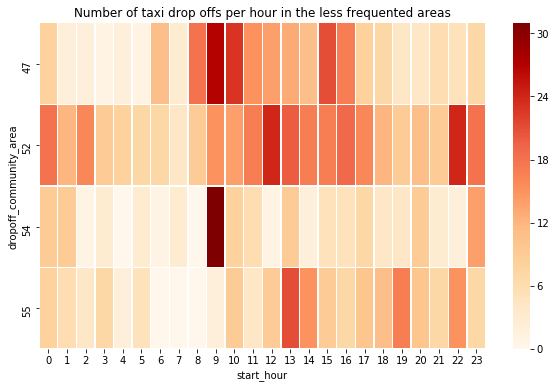

In [59]:
less_freq_do = taxi_rides[taxi_rides["dropoff_community_area"].isin(less_freq)]
hour_pu = less_freq_do[["dropoff_community_area","start_hour","taxi_id"  ]].groupby(["dropoff_community_area", "start_hour"]).count()
hour_pu = hour_pu.rename(columns={'taxi_id':'Count'})
hour_pu = hour_pu.reset_index()
hour_pu = hour_pu.pivot("dropoff_community_area","start_hour","Count").fillna(0)
fig, ax = plt.subplots(figsize=(10,6))      
plt.title("Number of taxi drop offs per hour in the less frequented areas")
sns.heatmap(hour_pu, linewidths=.5, ax=ax, cmap="OrRd")

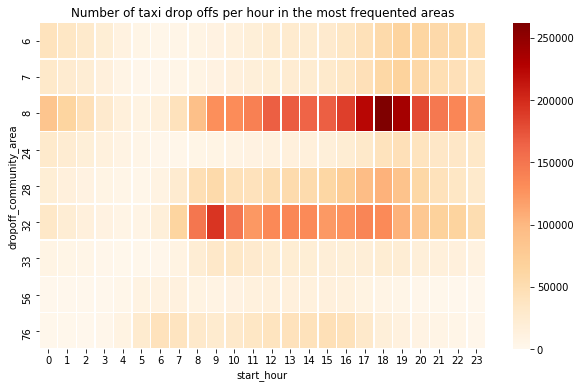

In [60]:
most_freq_pu = taxi_rides[taxi_rides["dropoff_community_area"].isin(most_freq)]
hour_pu = most_freq_pu[["dropoff_community_area","start_hour","taxi_id"  ]].groupby(["dropoff_community_area", "start_hour"]).count()
hour_pu = hour_pu.rename(columns={'taxi_id':'Count'})
hour_pu = hour_pu.reset_index()
hour_pu = hour_pu.pivot("dropoff_community_area","start_hour","Count").fillna(0) 
fig, ax = plt.subplots(figsize=(10,6))      
plt.title("Number of taxi drop offs per hour in the most frequented areas")
sns.heatmap(hour_pu, linewidths=.5, ax=ax, cmap="OrRd")

In [61]:
#Function to generate a base map to work on with
def gen_map(default_loc =[41.84, -87.623177], default_zoom = 12):
    base_map = folium.Map(location = default_loc, control_scale=True, zoom_start=default_zoom)
    return base_map

In [63]:
from folium.plugins import HeatMap
data_copy_pu = taxi_rides.copy()
data_copy_pu['count'] = 1
base_map_pu = gen_map()
HeatMap(data=data_copy_pu[['pickup_latitude', 'pickup_longitude', 'count']].groupby(['pickup_latitude', 'pickup_longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map_pu)

#### Heat Map of the number of pick-ups

In [64]:
base_map_pu

In [66]:
data_copy_do = taxi_rides.copy()
data_copy_do['count'] = 1
base_map_do = gen_map()
HeatMap(data=data_copy_do[['dropoff_latitude', 'dropoff_longitude', 'count']].groupby(['dropoff_latitude', 'dropoff_longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map_do)

#### Heat Map of the number of drop-offs

In [67]:
base_map_do

In [70]:
data_hour_list = []
for hour in data_copy_pu['start_hour'].sort_values().unique():
    data_hour_list.append(data_copy_pu.loc[data_copy_pu['start_hour'] == hour, ['pickup_latitude', 'pickup_longitude', 'count']]
                          .groupby(['pickup_latitude', 'pickup_longitude']).sum().reset_index().values.tolist())
 

In [71]:
from folium.plugins import HeatMapWithTime
base_map = gen_map()
HeatMapWithTime(data_hour_list, radius=5, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8).add_to(base_map)
base_map

## Flu clinics Dataset <a name="flu-clinics"/>

### 0. Data Loading <a name="data-loading-4"/>

In [108]:
import pandas as pd
import numpy as np
import request
from pathlib import Path
import matplotlib.pyplot as plt

In [109]:
data_path = Path('data')

In [110]:
flu_clinics = pd.read_csv(data_path/'fluu.csv')

### 1. Data Overview <a name="data-overview-4"/>

In [111]:
flu_clinics.shape

(1862, 27)

We have in total 1862 flu clinics. Lets now have a look at the data columns of our data

In [112]:
flu_clinics.columns

Index(['Season', 'Facility ID', 'Latitude', 'Longitude', 'Street1', 'Street2',
       'City', 'State', 'Postal Code', 'Country', 'Facility Name', 'URL',
       'Phone', 'Contact', 'Begin Date', 'End Date', 'Begin Time', 'End Time',
       'Begin DateTime', 'End DateTime', 'Recurrence Days', 'Hours',
       'Eligibility', 'Cost', 'Notes', 'Record ID', 'Location'],
      dtype='object')

In [113]:
print(flu_clinics.dtypes)

Season              object
Facility ID          int64
Latitude           float64
Longitude          float64
Street1             object
Street2             object
City                object
State               object
Postal Code          int64
Country             object
Facility Name       object
URL                 object
Phone               object
Contact             object
Begin Date          object
End Date            object
Begin Time          object
End Time            object
Begin DateTime      object
End DateTime        object
Recurrence Days     object
Hours               object
Eligibility         object
Cost                object
Notes               object
Record ID           object
Location            object
dtype: object


Here is the description of the data 

- **Facility name** (String): The name of the facility providing flu vaccinations.
- **Facility ID** (Number): The unique identifier for the facility providing flu vaccinations.
- **Facility type** (String): Denotes the type of facility providing flu vaccinations.
- **Street1** (String): The street address of the facility providing flu vaccinations.
- **Street2** (String): Supplementary street address information of the facility providing flu vaccinations.
- **City** (String): The city of the facility providing flu vaccinations.
- **State** (String): The state or province of the facility providing flu vaccinations.
- **Postal Code** (String): The postal code of the facility providing flu vaccinations.
- **Country** (String): The country of the facility providing flu vaccinations. (ISO 3166-1 alpha-2 format)
- **Latitude** (decimal): The latitude of the facility providing flu vaccinations. (Value in decimal degrees to an accuracy of no less than 5 decimal places)

- **Longitude** (decimal):The longitude of the facility providing flu vaccinations. (Value in decimal degrees to an accuracy of no less than 5 decimal places)
- **Phone** (String): A contact phone number for the facility providing flu vaccinations.
- **Contact** (String): The name of a contact person for the facility providing flu vaccinations.
- **URL** (String): A website providing additional information about the business or entity administering flu vaccinations.
- **Begin DateTime** (date): The date on which vaccinations begin at a specified location. (ISO 8601 format)
- **End DateTime** (date): The date on which vaccinations end at a specified location. (ISO 8601 format)
- **Begin Time** (time): The local time at which vaccinations begin being dispensed at a specified location. (ISO 8601 format)
- **End Time** (time): The local time at which vaccinations begin being dispensed at a specified location. (ISO 8601 format)
- **Eligibility** (String): Limitations on eligibility for vaccinations at a specific location.
- **Notes** (String): List of any documents or documentation that might be needed to receive vaccination. Use the pipe (‘|’) delimiter to separate document names if multiple documents are required.
- **Location** (decimal): Longitude and Latiude
- **Cost** (decimal): The cost for vaccinations at a specified location (if any).
- **Season** (String): Season when is was given 
- **Record ID** (String): An id for the record (unique)
- **Recurrence Days** (String): Which day of the week it was given

As we can see we have a lot of information for each of the flu clinics. This will allow us to have a multitude of different analysis.

### 2. Data Cleaning <a name="data-cleaning-4"/>

In [115]:
flu_clinics_init = flu_clinics.copy() # storing a copy of the original df

First of all, ther are some columns that are cleary not relevant

- **Contact, URL, ELigibility, Record ID, Phone** : Clearly we have no use for them
- **Location** : It is redundant as we already have columns Longitude and Latitude

In [116]:
to_drop = ['Contact', 'URL', 'Eligibility', 'Record ID', 'Phone', 'Location']

In [117]:
flu_clinics = flu_clinics.drop(columns=to_drop)

Now we need to look at the missing values and what to do with them

In [118]:
flu_clinics.isnull().mean() 

Season             0.000000
Facility ID        0.000000
Latitude           0.000000
Longitude          0.000000
Street1            0.000000
Street2            0.988185
City               0.000000
State              0.000000
Postal Code        0.000000
Country            0.000000
Facility Name      0.000000
Begin Date         0.000000
End Date           0.000000
Begin Time         0.769603
End Time           0.769603
Begin DateTime     0.769603
End DateTime       0.769603
Recurrence Days    0.000000
Hours              0.230397
Cost               0.081633
Notes              0.752417
dtype: float64

Notes, Street2, and the Begin and End Time and DateTime can be dropped as they have too over 75% of missing values

In [119]:
to_drop_m = ['Street2', 'Notes', 'Begin Date', 'End Date', 'Begin DateTime', 'End DateTime', 'Begin Time', 'End Time']

In [120]:
flu_clinics = flu_clinics.drop(columns=to_drop_m)

We cannot really do much more with the remaining missing values as it is not possible infer them. Let's look at how disparse the data is

In [121]:
flu_clinics.nunique()

Season               6
Facility ID        342
Latitude           913
Longitude          927
Street1            491
City                 5
State                1
Postal Code         58
Country              1
Facility Name      245
Recurrence Days     15
Hours               87
Cost                 5
dtype: int64

First of all, we can directly delete Country and State as they obviously only have one element

In [184]:
to_drop_u = ['Country', 'State']

The City oddly has 5 different elements

In [123]:
flu_clinics['City'].unique()

array(['CHICAGO', 'Chicago', 'CHICAGO HEIGHTS', 'NORRIDGE', 'LANSING'],
      dtype=object)

By doing some research we can see that Chicago Heights, Norridge and Lansing are all part of Chicago Geographically. So we can also drop the City column as it only has Chicago 

In [124]:
to_drop_u.append('City')

In [125]:
flu_clinics = flu_clinics.drop(columns=to_drop_u)

### 3. Exploratory Data Analysis <a name="eda-4"/>

#### 3.1 Day of the week distribution

Let us look at when in the week do the clinics tend to give flu vaccines

In [128]:
flu_clinics['Recurrence Days'].value_counts()

Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday      1243
Saturday                                                             112
Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday        80
Thursday                                                              69
Monday, Tuesday, Wednesday, Thursday, Friday                          64
Friday                                                                59
Wednesday                                                             57
Tuesday                                                               53
Sunday                                                                41
Monday                                                                38
Monday, Tuesday, Wednesday, Thursday, Friday, Saturday                16
Monday, Tuesday, Wednesday                                            12
Thursday, Friday                                                      12
Sunday, Monday, Tuesday, Wednesday, Thursday, Frida

In [134]:
day_of_week = flu_clinics['Recurrence Days'].apply(lambda x : x.replace(' ', '').split(',')).explode()

In [155]:
count_per_day = day_of_week.value_counts()
count_per_day

Thursday     1490
Friday       1480
Wednesday    1478
Tuesday      1474
Monday       1459
Saturday     1455
Sunday       1368
Name: Recurrence Days, dtype: int64

As we can see, those values are pretty, let's plot it to have a better look at it

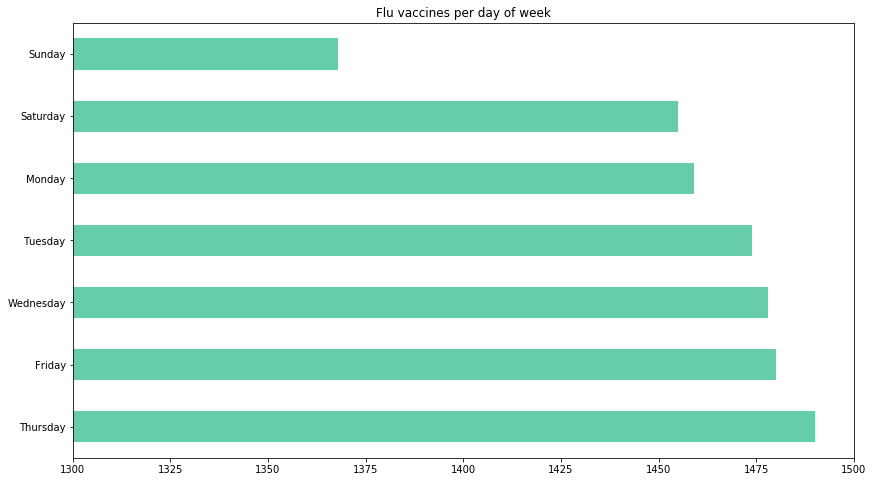

In [159]:
plt.figure(figsize=(14, 8))
count_per_day.plot(kind='barh', color='mediumaquamarine', xlim=[1300, 1500])
plt.title('Flu vaccines per day of week')
plt.show()


#### 3.2 Overall flu vaccines over time

It would be interesting to see if the amount of flu vaccines changed over the years

In [162]:
flu_clinics.Season.unique()

array(['2015-2016', '2018-2019', '2017-2018', '2014-2015', '2019-2020',
       '2016-2017'], dtype=object)

In [182]:
count_per_season = flu_clinics.Season.value_counts() 
count_per_season = count_per_season.sort_index()
count_per_season

2014-2015    332
2015-2016    342
2016-2017    299
2017-2018    297
2018-2019    288
2019-2020    304
Name: Season, dtype: int64

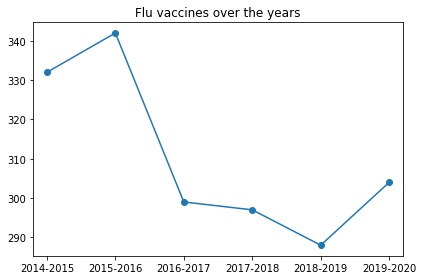

In [183]:
count_per_season.plot(kind='line', marker='o', xlim=[-0.2, 5.2])
plt.title('Flu vaccines over the years')
plt.tight_layout()
plt.show()

As we can see, they are less and less flu vaccines over the year with a slight augmentation in 2019-2020

#### 3.3 Flu vaccines location

In [188]:
import seaborn as sns

Let us look at the distribution of the clinics who gave flu vaccinations in Chicago and see if we can get some insight from it

Here is the map of Chicago as seen beefore: 

![Chicago Community Areas](https://upload.wikimedia.org/wikipedia/commons/9/94/Blank_Chicago_Community_Area_Map.png)

As for the locations :

In [201]:
data = flu_clinics[['Latitude', 'Longitude']]

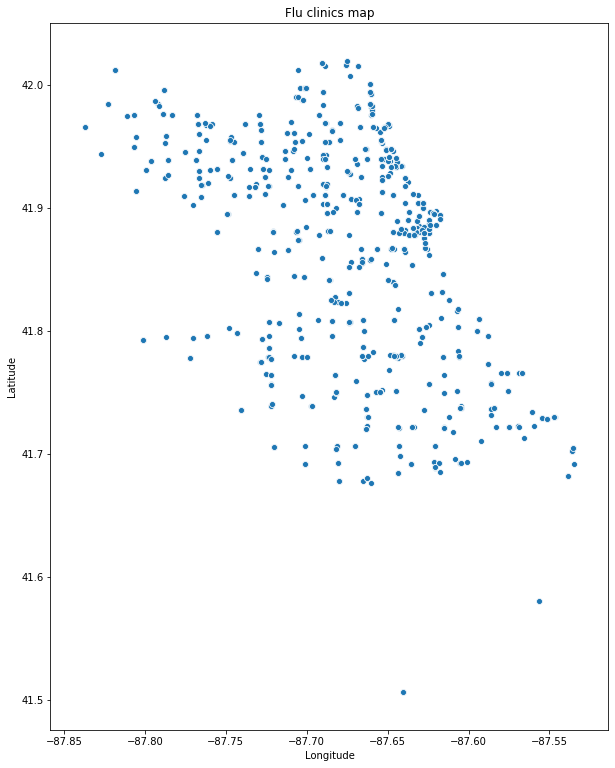

In [205]:
plt.figure(figsize=(10, 13))
sns.scatterplot(x='Longitude', y='Latitude', data = data)
plt.title('Flu clinics map')
plt.show()

We can clearly see that there is bigger amount of clinics that gave flu vaccines closer to the lake, otherwise it looks like i is uniformly distributed

# What's next?<a name="what-next"/>

### Datasets and how to merge them


We finally decided to focus our efforts on the 'Chicago Crime' but we will also use the 'Food Inspection', 'Taxi Rides', and 'Flu Clinics' datasets to have deeper understanding of Chicago's quality of life.

In order to merge the data analysis we can use the 'Community Area' field of the 'Chicago Crime' and 'Taxi Rides' dataset. However we don't have such feature for the 'Food Inspection' and 'Flu Clinics' datasets. But we do have access to 'Longitude' and 'Latitude' so the first step would be to build a simple modle to predict the community areas given the location. The idea would be to train the classification model with the data from the 'Chicago Crime' dataset using Longitude and Latitude as features and outputs the 'Community Area' probability. By using this model on the other two datasets we will have a common feature ('Community Area') to use in our safety and life quality per neighborhood analysis.

### How are we going to use our datasets?

   - **Violence spatial distribution:**
    We will first study how violent crimes are spread across the city's 'Community Area'. It involves classifying type of crime to only consider the violent ones.

   - **Crime temporal evolution:** 
    We want to see the evolution of crime per neighboord with time. Indeed we can use our clean data to perform analysis per neighboord. We will see if 'Community Areas' have the same evolution with time or if there is a disparity between them.
    
   - **Quality of life factors:**
    Once we identify the neighborhoods more concerned by violence we can use our other datasets to see what are the statistics for those violent neighborhood compared to calm districts. For example we can see if the the food inspections have higher failure rate in those districts. We can also look at the number of clinics. Finally we can look at the taxi rides to see if we can identify interesting patterns.
    
   - **Are there no-go zones?**
    Using the 'Taxi Rides' dataset we can search for less frequented areas and see if it's correlated with the violence areas?
    
    
### Predictive models built from our data


As suggested after Milestone 1 we can use our datasets to build interesting predictive models using machine learning technique. 

   - We would like to build a model that given a crime report (location, time, type..) predicts if the Police will arrest the author.
    
   - Given a crime report (location, time, location description) predicts the type of crime. It could help the Police to have an adapted response.
    
   - Given a time and a location, estimate the probability of being victim of a crime.
   
   
### Conclusion:

Now that we explored our datasets, we know what can be done and what questions we will answer. Indeed we chose to remove some datasets such as the 'Towed Vehicle' and 'Fire and Police stations' due to their lack of relevant information. We thus updated the README accordingly.

